In [1]:
from manim import *
import numpy as np
import logging
import random

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.2

In [2]:
np.random.seed(42)
wq, wk, wv = np.random.randn(3, 2).round(2), np.random.randn(3, 2).round(2), np.random.randn(3, 2).round(2)
x = np.random.rand(4, 3).round(2)
q, k, v = x @ wq, x @ wk, x @ wv
q, k, v = q.round(2), k.round(2), v.round(2)
w_out = np.random.randn(2, 3).round(2)
c = np.random.rand(3, 6).round(2)
wksa, wvsa = np.random.randn(6, 2).round(2), np.random.randn(6, 2).round(2)
ksa, vsa = c @ wksa, c @ wvsa

print(wq)
print(x)

[[ 0.5  -0.14]
 [ 0.65  1.52]
 [-0.23 -0.23]]
[[0.29 0.37 0.46]
 [0.79 0.2  0.51]
 [0.59 0.05 0.61]
 [0.17 0.07 0.95]]


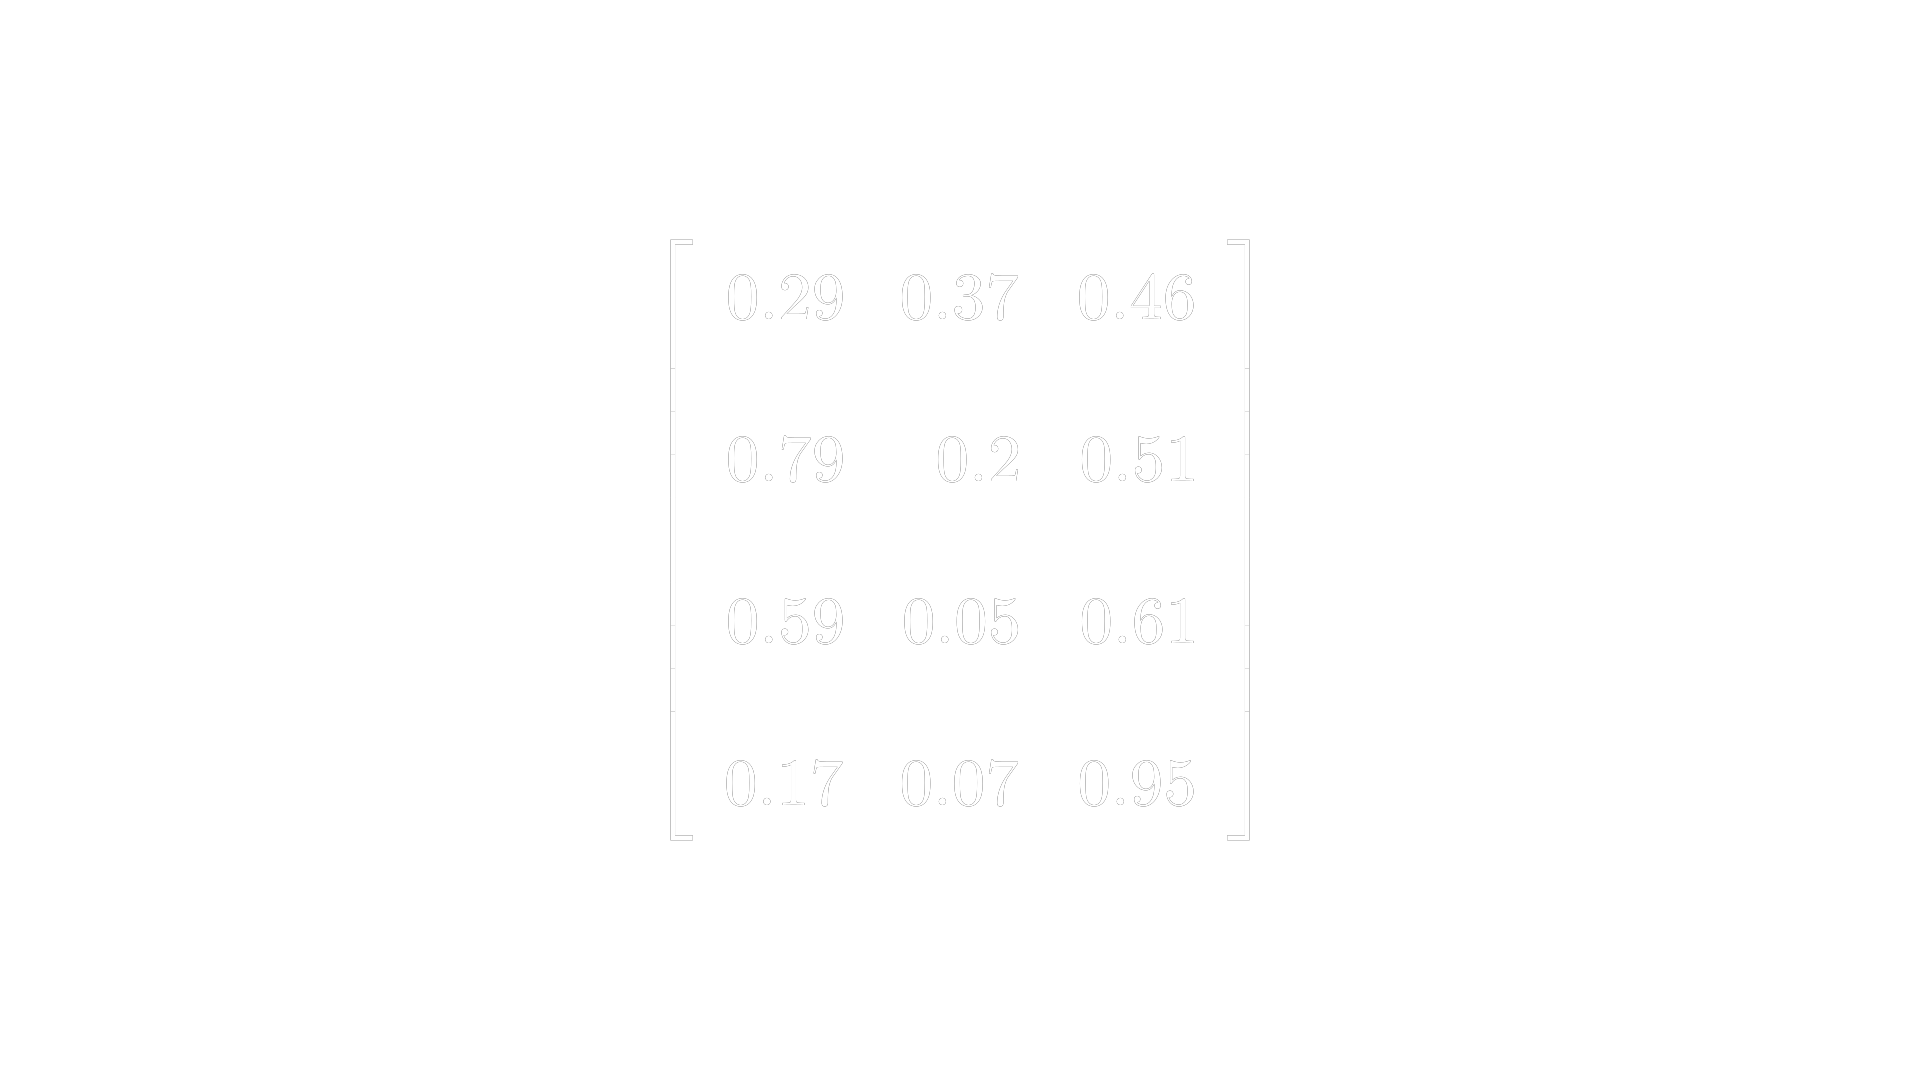

In [8]:
%%manim -qh --transparent -o x.png Weight 

class Weight(Scene):
    def construct(self):
#         W = Matrix(k, h_buff=1.5, bracket_h_buff=0.05)
        W = Matrix(x, v_buff=1.2)
#         self.play(FadeIn(W))
        self.add(W)
#         self.wait(2)

In [17]:
%%manim -qh --transparent MatrixMultiplication

class MatrixMultiplication(Scene):

    def construct(self):
        A = np.random.randint(0, 10, (1, 4))
        B = np.random.randint(0, 10, (4, 6))
        C = np.dot(A, B)
        
        stuff = VGroup(Matrix(A), Matrix(B), Matrix(C))
        matrixA = stuff[0]
        matrixB = stuff[1]
        matrixC = stuff[2]
        matrixA.height = 0.4
        matrixB.height = 0.8
        matrixC.height = 0.4
        font_size = 30
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
        shape_A = Tex(f"{A.shape[0]} x {A.shape[1]}", color=WHITE, font_size = 20)
        shape_B = Tex(f"{B.shape[0]} x {B.shape[1]}", color=WHITE, font_size = 20)
        shape_C = Tex(f"{C.shape[0]} x {C.shape[1]}", color=WHITE, font_size = 20)
        
        self.play(Write(matrixA))
        self.play(matrixA.animate.scale(1).shift(LEFT*3))
        
        shape_A.next_to(matrixA, DOWN)
        self.play(Write(shape_A), runtime=0.01)
        
        Dot.next_to(matrixA, RIGHT)
        self.play(Write(Dot))
        
        matrixB.scale(1).next_to(Dot, RIGHT)
        self.play(Write(matrixB), runtime=0.01)
        
        shape_B.next_to(matrixB, DOWN)
        self.play(Write(shape_B))
        
        Equals.next_to(matrixB, RIGHT)
        self.play(Write(Equals))
        
        matrixC.next_to(Equals)
        C_elements = VGroup(*matrixC)
        # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in C_elements[1:]:  # Here we only print [ and ]
#             i.height = 0.8
            self.play(Write(i), runtime=0.01)
        C_elements = VGroup(*C_elements[0])  # Create array for matrix itself
        shape_C.next_to(shape_A, RIGHT*22)
        self.play(Write(shape_C), runtime=0.1)
#         A_rows = matrixA.get_rows()
#         B_columns = matrixB.get_columns()
        
        for i, row in enumerate(matrixA.get_rows()):
            for j, column in enumerate(matrixB.get_columns()):
#                 matrixA.add(SurroundingRectangle(row))
#                 matrixB.add(SurroundingRectangle(column))
                row.set_color(RED)
                column.set_color(RED)
                _Dot = Dot.copy()
                _r = row.copy()
                _c = column.copy()
                res = C_elements.copy()[i*B.shape[1] + j]
                logging.debug(f"res at {i} & {j} ", res)
                self.add(_Dot)
                g = VGroup(_r, _Dot, _c)
                self.play(Transform(g, res), runtime=0.3)
                row.set_color(WHITE)
                column.set_color(WHITE)
            
        self.wait()
#         self.play(Write(Text("Code in the desciption", font_size=80)))
#         self.wait()
        

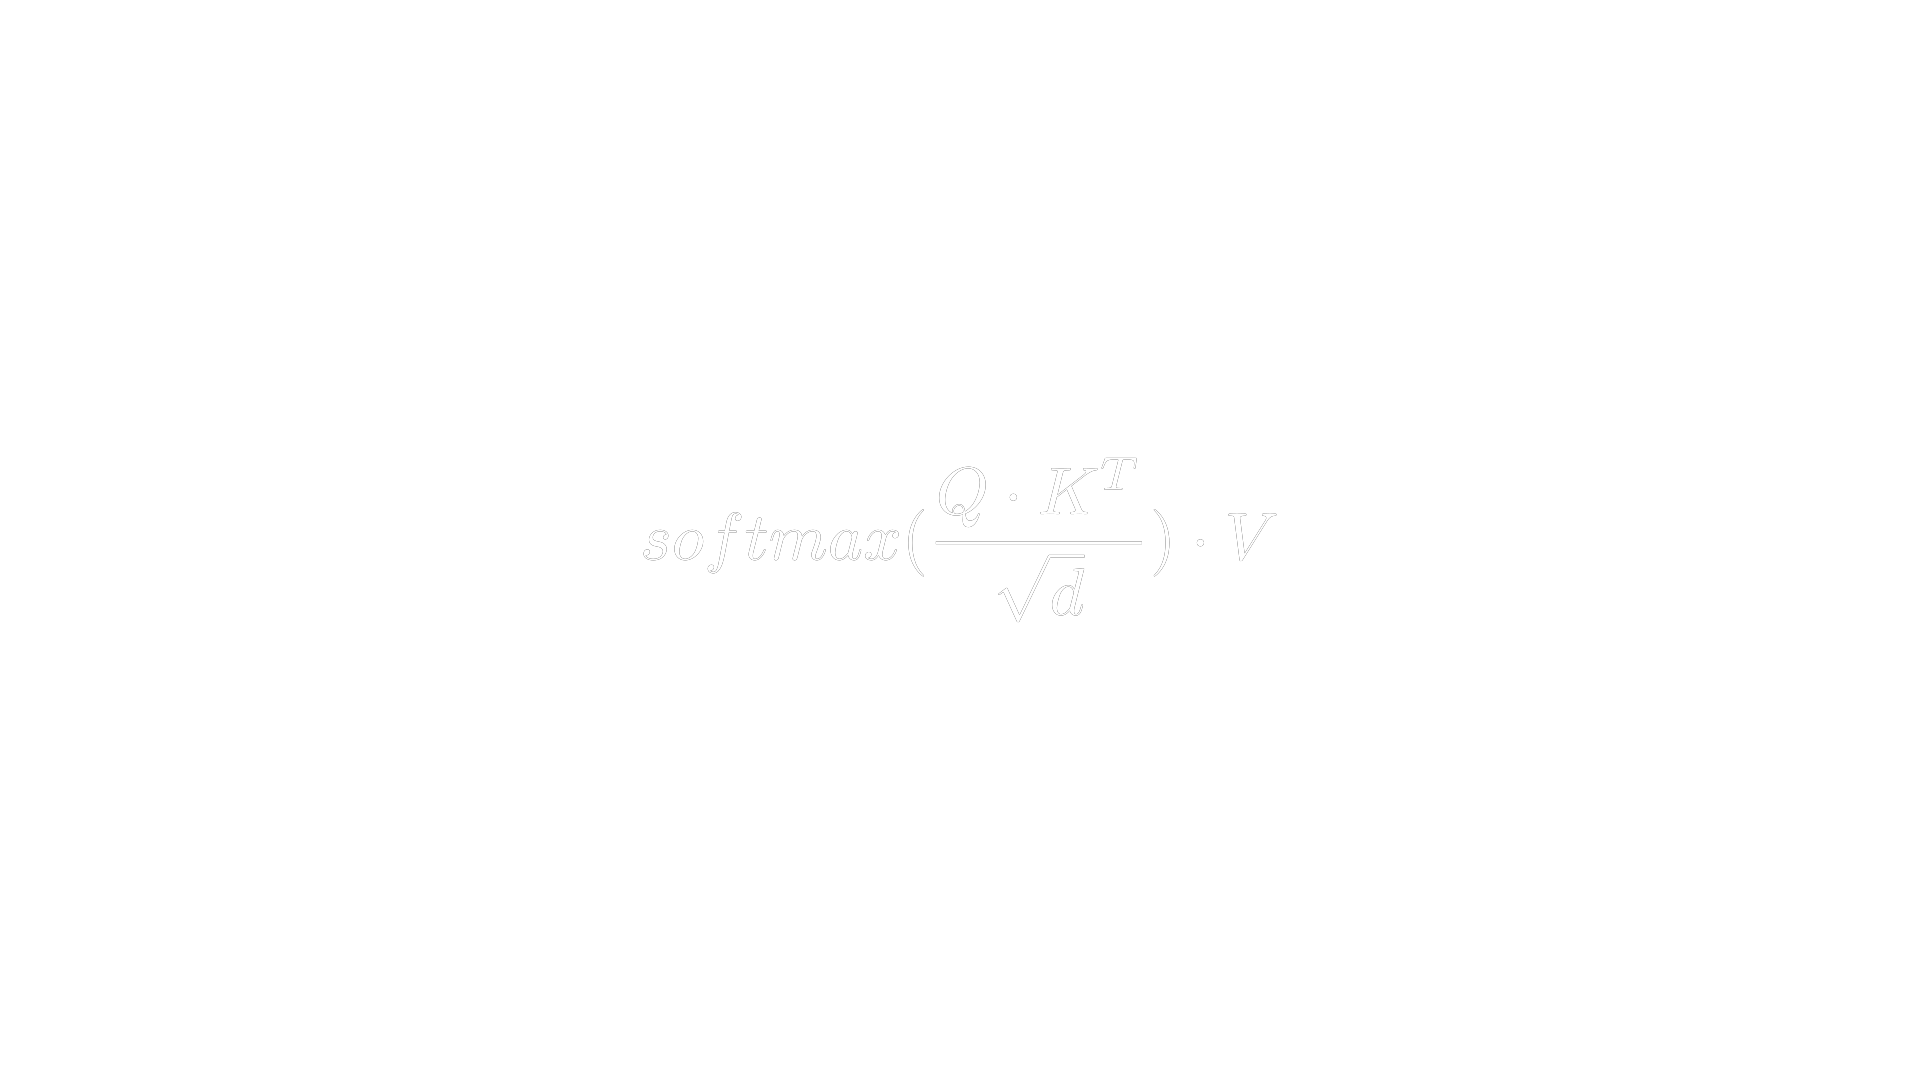

In [4]:
%%manim -qh --transparent Softmax

class Softmax(Scene):
    def construct(self):
        t = MathTex(r"softmax(\frac{Q \cdot K^T}{\sqrt{d}}) \cdot V")
        self.add(t)
#         self.play(Write(t))
#         self.wait(2)

In [87]:
%%manim -qh --transparent Grid

def calculate_center(vertices):
    center = np.array(vertices).mean(axis=0)
    return center

class Grid(Scene):
    def construct(self, size=10):
        squares = VGroup(*[Square(side_length=0.8) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        start_center = calculate_center(squares[size**2 // 2 + size // 2].get_vertices())
        print(squares[0].get_vertices())
        self.play(Write(squares))
        self.wait(2)


[[-3.2  4.   0. ]
 [-4.   4.   0. ]
 [-4.   3.2  0. ]
 [-3.2  3.2  0. ]]


In [93]:
%%manim -qh --transparent GridAttention

def calculate_center(vertices):
    center = np.array(vertices).mean(axis=0)
    return center

class GridAttention(Scene):
    def construct(self, size=10):
        squares = VGroup(*[Square(side_length=0.8) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        start_center = calculate_center(squares[size**2 // 2 + size // 2].get_vertices())
        print(squares[0].get_vertices())
        self.add(squares)
        for sq in random.sample(list(squares), 26):
            sq_center = calculate_center(sq.get_vertices())
#             line = Line(start_center, sq_center)
            line = Arrow(start_center, sq_center, stroke_width=2, tip_length=0.15)
            self.play(Write(line), run_time=0.1)
        
            sq_copy = sq.copy()
            sq_copy.set_color(RED)
            self.play(Write(sq_copy), run_time=0.1)
        self.wait(2)


[[-3.2  4.   0. ]
 [-4.   4.   0. ]
 [-4.   3.2  0. ]
 [-3.2  3.2  0. ]]


In [85]:
%%manim -qh --transparent GridConv

def calculate_center(vertices, scale=1.0, start_center=None):
    center = np.array(vertices).mean(axis=0)
#     print(f"Before scaling: {center}")
#     print(f"After scaling: {center * scale}")
    if scale > 1.0:
        center -= start_center
        center *= scale
        center += start_center
    return center

class GridConv(Scene):
    def construct(self, size=10):
        squares = VGroup(*[Square(side_length=0.8) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        start_number = size**2 // 2 + size // 2  # 55
        surroundings = sorted([start_number+1, start_number-1, start_number - size, start_number - size + 1, start_number - size - 1, start_number + size, start_number + size + 1, start_number + size - 1])
        start_center = calculate_center(squares[start_number].get_vertices())
        print(squares[0].get_vertices())
        self.add(squares)
        surroundings_squares = [list(squares)[int(i)] for i in surroundings]
        for sq in surroundings_squares:
            sq_center = calculate_center(sq.get_vertices(), scale=1.2, start_center=start_center)
            line = Arrow(start_center, sq_center, stroke_width=2, tip_length=0.15)
            self.play(Write(line), run_time=0.2)
            self.wait(0.15)
            
            sq_copy = sq.copy()
            sq_copy.set_color(RED)
            self.play(Write(sq_copy), run_time=0.1)
        self.wait(2)


[[-3.2  4.   0. ]
 [-4.   4.   0. ]
 [-4.   3.2  0. ]
 [-3.2  3.2  0. ]]


In [160]:
%%manim -qh --disable_caching ImageRGB

def get_image_channel(img_rgb: ImageMobject, channel: int=0, scale: float=1.0, squares=None):
    img_rgb = img_rgb.get_pixel_array()
    temp = np.zeros(img_rgb.shape, dtype="uint8")
    temp[:, :, 3] = img_rgb[:, :, 3]
    temp[:, :, channel] = img_rgb[:, :, channel]
    img_rgb = ImageMobject(temp)
    img_rgb = img_rgb.scale(scale)
    if squares:
        img_sq = squares.copy().shift(RIGHT*4).scale(0.96)
        img_rgb = Group(img_rgb, img_sq)
    return img_rgb

def _flatten_patches(img_rgb: np.array, size: int=2):
    M = img_rgb.shape[0]//size
    N = img_rgb.shape[1]//size
    tiles = [img_rgb[x:x+M,y:y+N] for x in range(0,img_rgb.shape[0],M) for y in range(0,img_rgb.shape[1],N)]
    return tiles

def flatten_image(img_rgb: ImageMobject, size: int=2):
    img_rgb = img_rgb.get_pixel_array()
    tiles = _flatten_patches(img_rgb)
    return [ImageMobject(tile) for tile in tiles]
    

class ImageRGB(Scene):
    def construct(self, size=2):
        img_rgb = ImageMobject("./images/mountain.png").scale(0.8)
        
        self.add(img_rgb)
        squares = VGroup(*[Square(side_length=1.5) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        self.play(Write(squares))
        
        self.wait(2)
        
        gridded_img_rgb = Group(img_rgb, squares)
        self.play(gridded_img_rgb.animate.shift(LEFT * 4).scale(0.6))
        
        arrow = Arrow(start=LEFT, end=RIGHT*0.5).next_to(gridded_img_rgb, RIGHT*1.5)
        self.play(Write(arrow))
        
        sc = 0.45
        r = get_image_channel(img_rgb, channel=0, scale=sc, squares=squares)
        b = get_image_channel(img_rgb, channel=1, scale=sc, squares=squares)
        g = get_image_channel(img_rgb, channel=2, scale=sc, squares=squares)
        r.shift(DOWN*sc, LEFT*sc)
        g.shift(UP*sc, RIGHT*sc)
        rgb = Group(g, b, r)
        self.play(rgb.animate)
        
        arrow2 = Arrow(start=LEFT, end=RIGHT*0.5).next_to(rgb, RIGHT*1.5)
        self.play(Write(arrow2))
        
        r = flatten_image(get_image_channel(img_rgb, channel=0))
        g = flatten_image(get_image_channel(img_rgb, channel=1))
        b = flatten_image(get_image_channel(img_rgb, channel=2))
        
        sc = 0.4
        run_time = 0.6
        rgb.z_index=1
        for i, (_r, _g, _b) in enumerate(zip(r, g, b)):
            _r, _g, _b = _r.scale(sc), _g.scale(sc), _b.scale(sc)
            _r.z_index = 0
            _g.z_index = 0
            _b.z_index = 0
            
            _r.move_to(rgb)
            self.play(_r.animate, run_time=0.1)
            self.play(_r.animate.next_to(arrow2).shift(UP + (DOWN*(i-0.5))), run_time=run_time)
            
            _g.move_to(rgb)
            self.play(_g.animate, run_time=0.1)
            self.play(_g.animate.next_to(arrow2).shift(UP + (DOWN*(i-0.5))).next_to(_r, RIGHT, buff=0.), run_time=run_time)
            
            _b.move_to(rgb).shift(UP*sc, RIGHT*sc)
            self.play(_b.animate, run_time=0.1)
            self.play(_b.animate.next_to(arrow2).shift(UP + (DOWN*(i-0.5))).next_to(_g, RIGHT, buff=0.), run_time=run_time)
            
        self.wait(10)


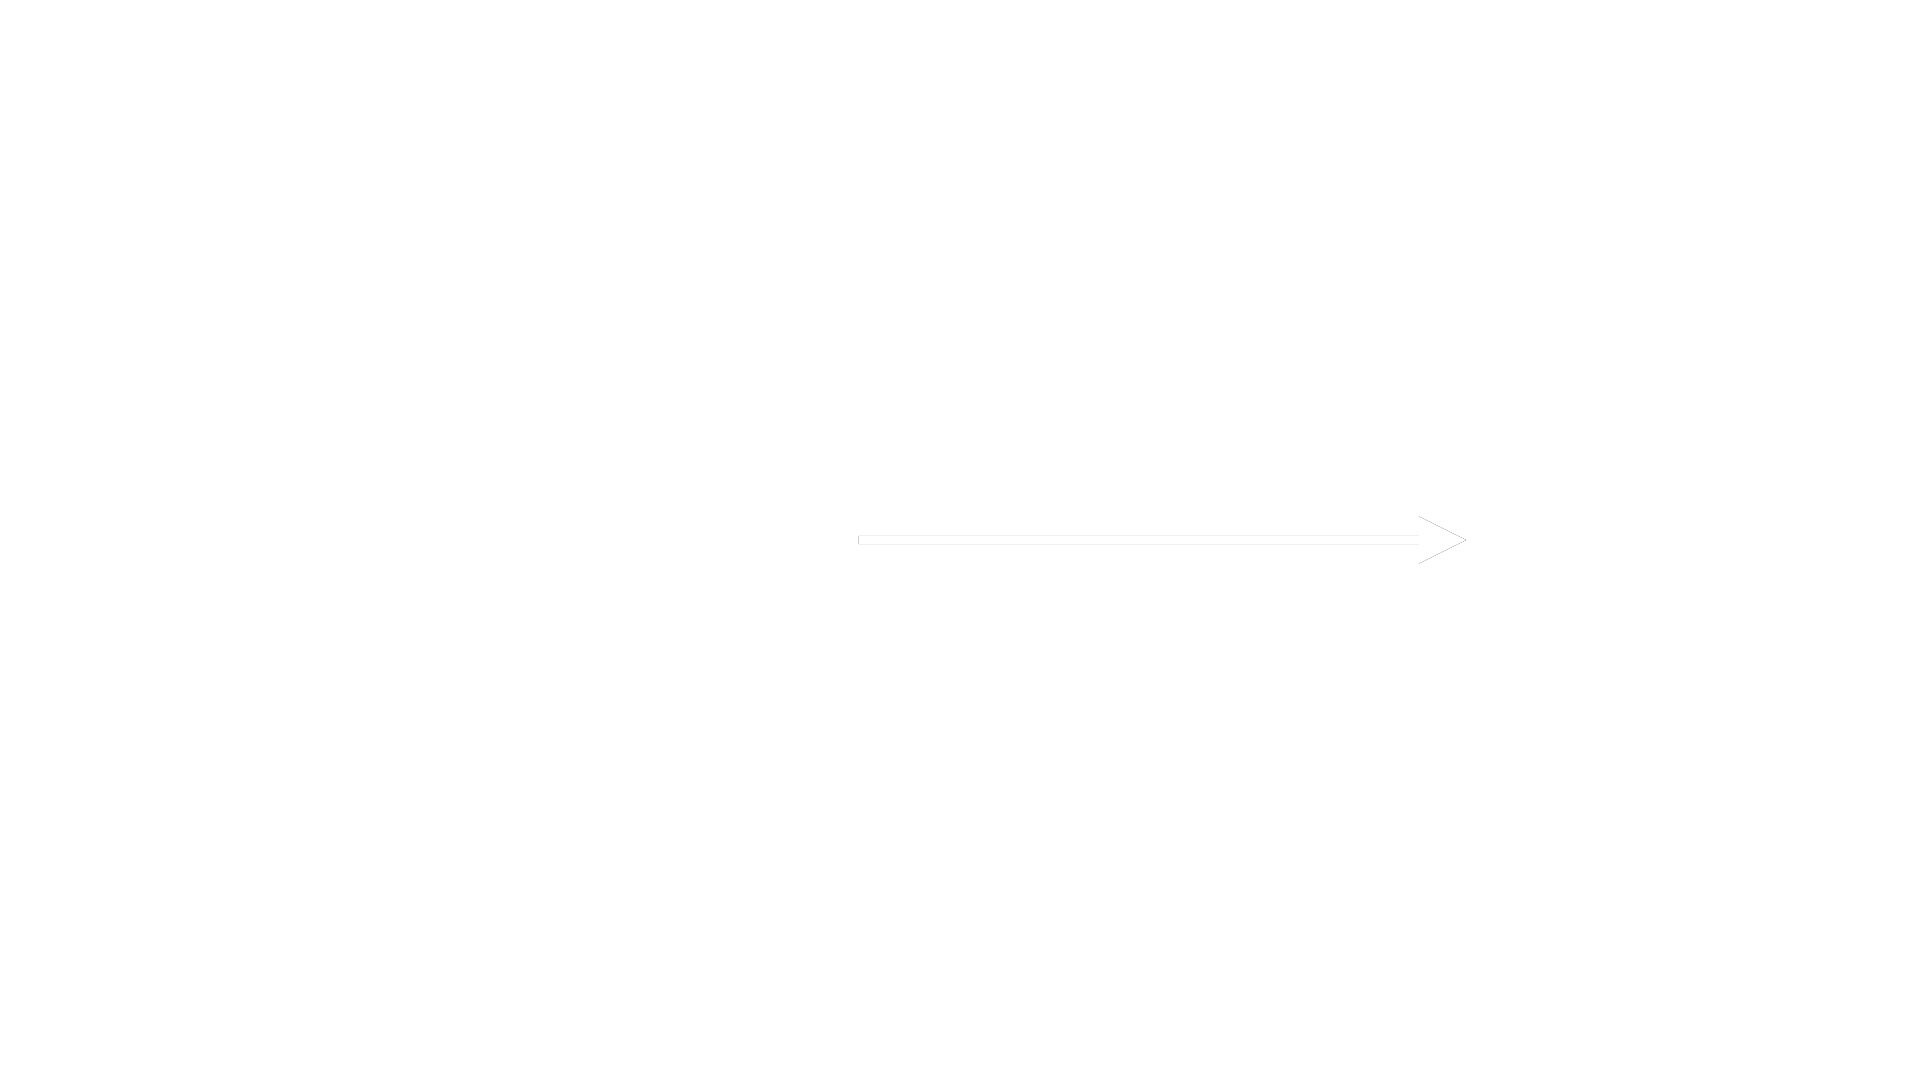

In [22]:
%%manim -qh --transparent Arrow_

class Arrow_(Scene):
    def construct(self):
        arrow = Arrow(start=LEFT, end=RIGHT*4)
        self.add(arrow)

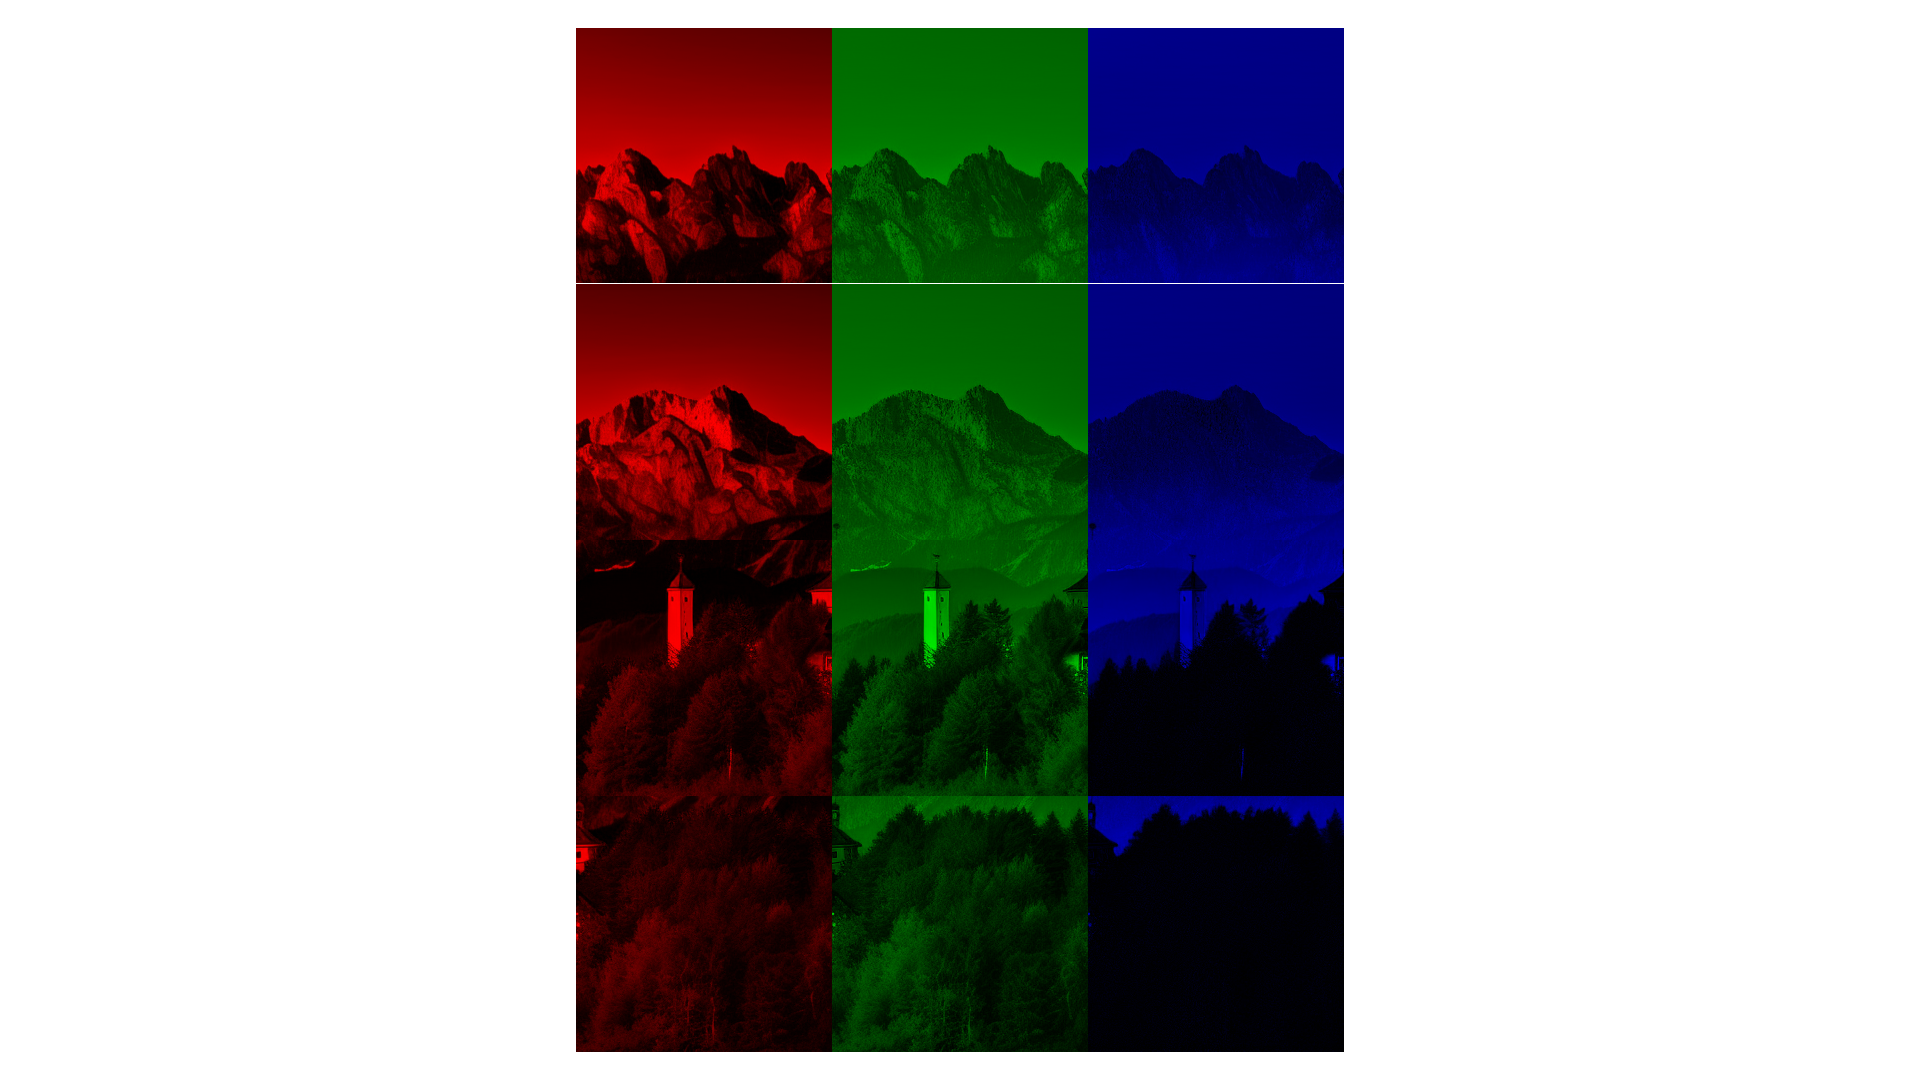

In [55]:
%%manim -qh --transparent RGBWeight

def get_image_channel(img_rgb: ImageMobject, channel: int=0, scale: float=1.0, squares=None):
    img_rgb = img_rgb.get_pixel_array()
    temp = np.zeros(img_rgb.shape, dtype="uint8")
    temp[:, :, 3] = img_rgb[:, :, 3]
    temp[:, :, channel] = img_rgb[:, :, channel]
    img_rgb = ImageMobject(temp)
    img_rgb = img_rgb.scale(scale)
    if squares:
        img_sq = squares.copy().shift(RIGHT*4).scale(0.96)
        img_rgb = Group(img_rgb, img_sq)
    return img_rgb

def _flatten_patches(img_rgb: np.array, size: int=2):
    M = img_rgb.shape[0]//size
    N = img_rgb.shape[1]//size
    tiles = [img_rgb[x:x+M,y:y+N] for x in range(0,img_rgb.shape[0],M) for y in range(0,img_rgb.shape[1],N)]
    return tiles

def flatten_image(img_rgb: ImageMobject, size: int=2):
    img_rgb = img_rgb.get_pixel_array()
    tiles = _flatten_patches(img_rgb)
    return [ImageMobject(tile) for tile in tiles]
    

class RGBWeight(Scene):
    def construct(self, size=2):
        img_rgb = ImageMobject("./images/mountain.png").scale(0.8)
        
        r = flatten_image(get_image_channel(img_rgb, channel=0))
        g = flatten_image(get_image_channel(img_rgb, channel=1))
        b = flatten_image(get_image_channel(img_rgb, channel=2))
        rgb = []
        for _r, _g, _b in zip(r, g, b):
            rgb += [_r, _g, _b]
        rgb_group = Group(*rgb).arrange_in_grid(rows=4, cols=3, buff=0.)
        self.add(rgb_group)


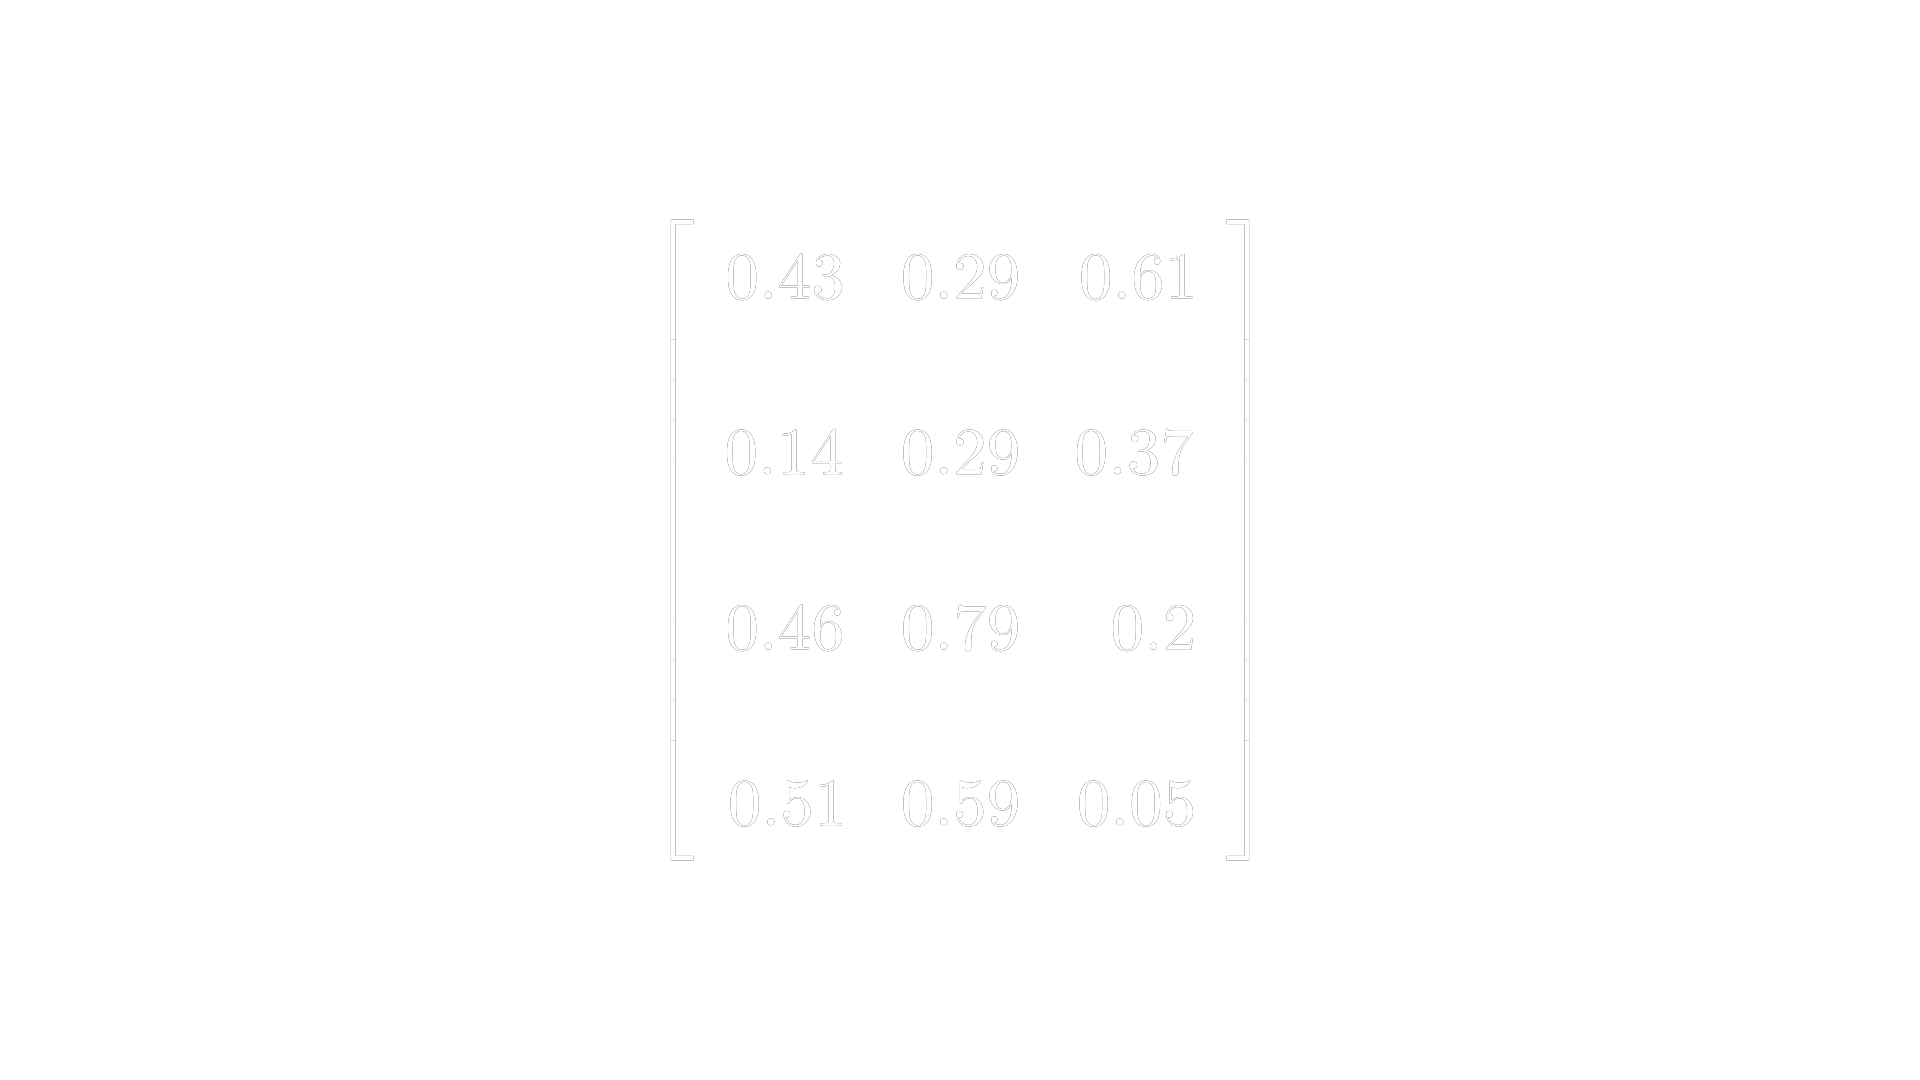

In [60]:
%%manim -qh --transparent -o x.png Weight 

class Weight(Scene):
    def construct(self):
        W = Matrix(x, v_buff=1.3)
        self.add(W)


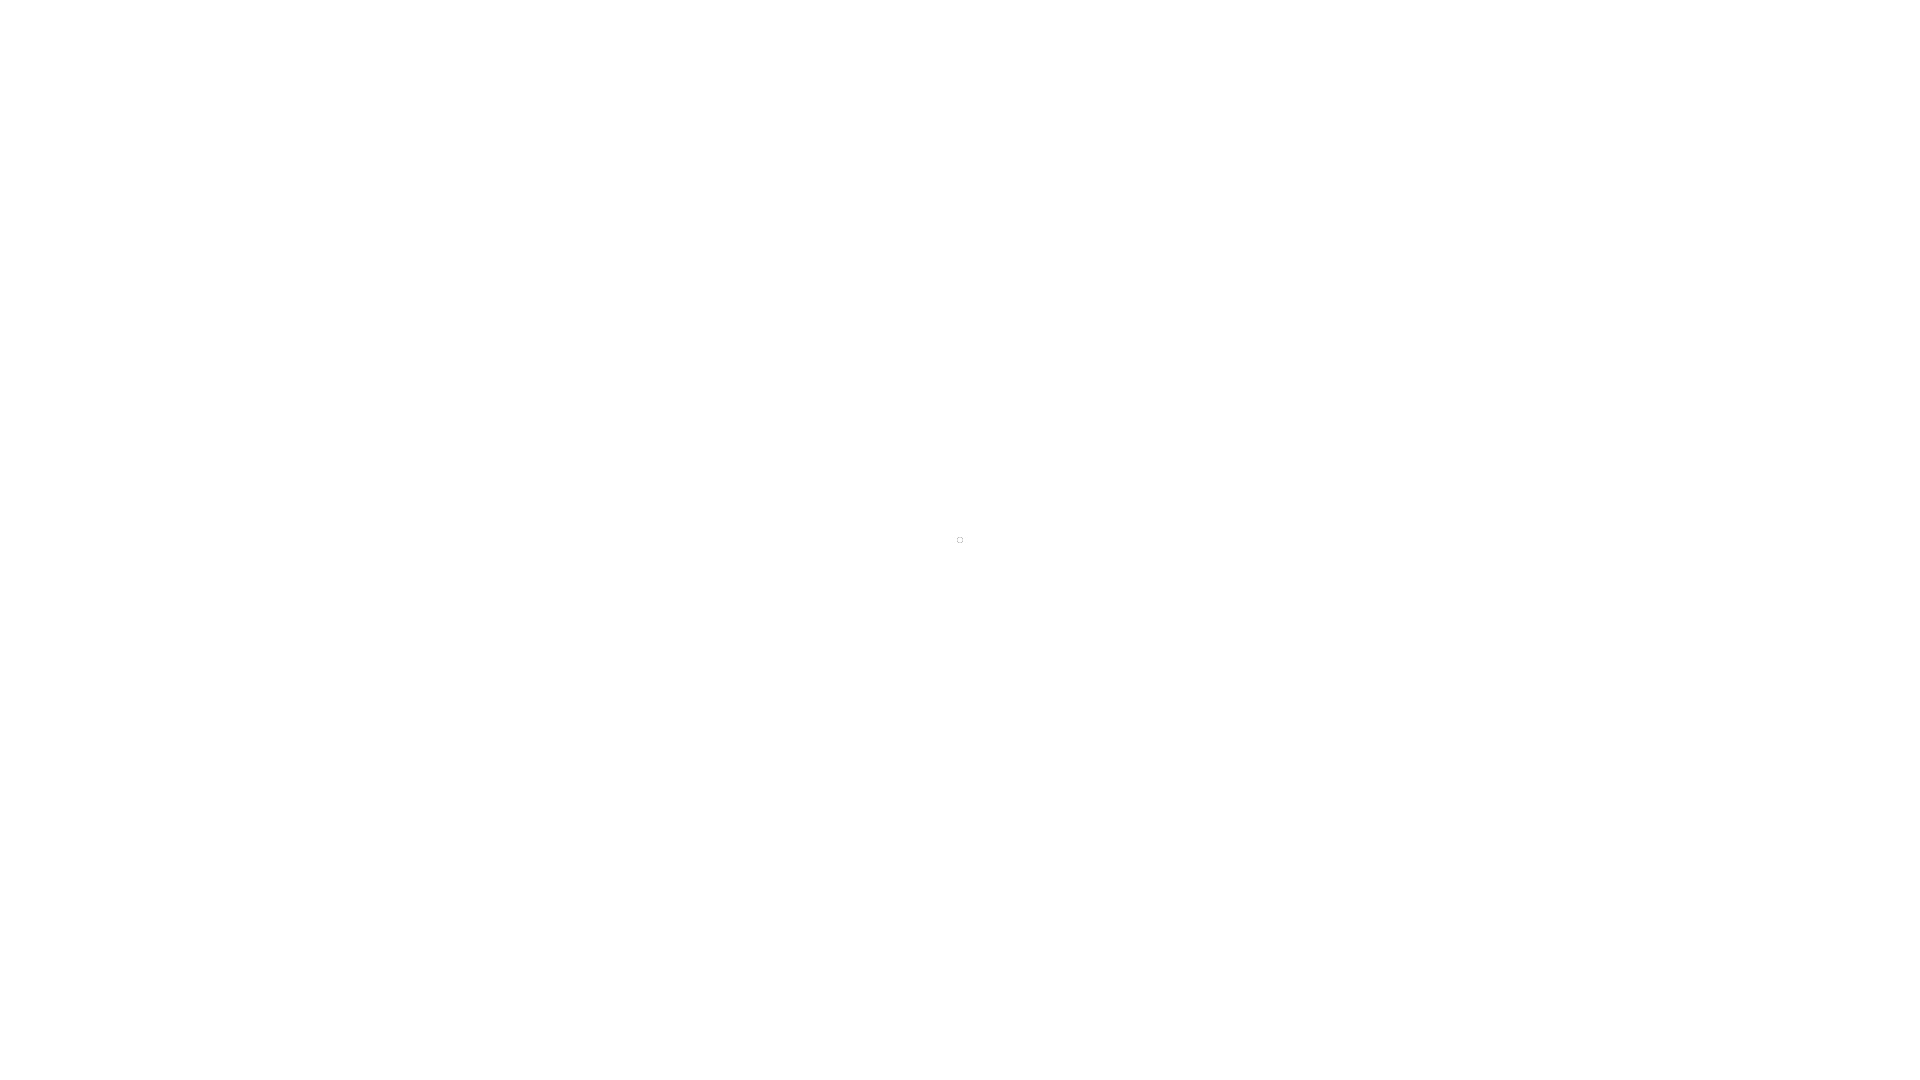

In [62]:
%%manim -qh --transparent -o dot.png Dot 

class Dot(Scene):
    def construct(self, font_size=40):
        Dot = Tex(".", color=WHITE, font_size = font_size)
        self.add(Dot)


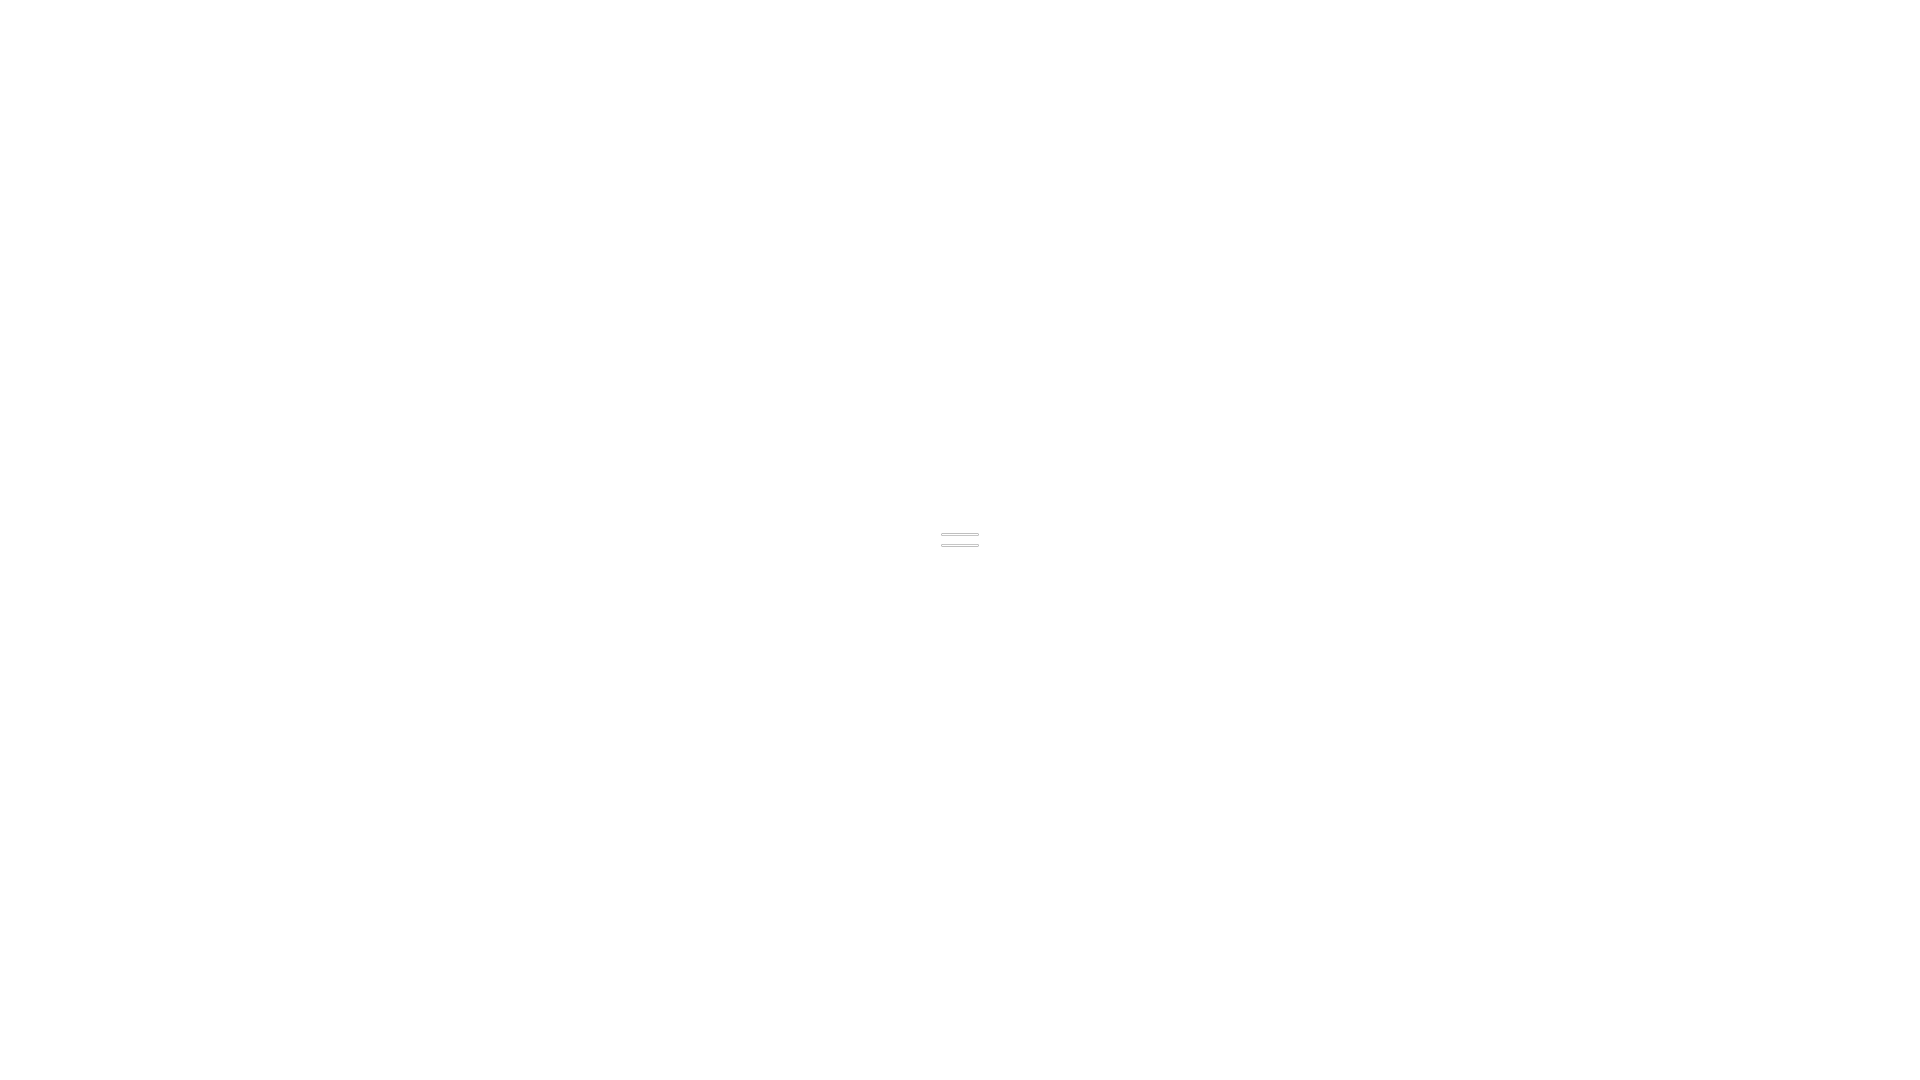

In [63]:
%%manim -qh --transparent -o equals.png Equals 

class Equals(Scene):
    def construct(self, font_size=40):
        Dot = Tex("=", color=WHITE, font_size = font_size)
        self.add(Dot)


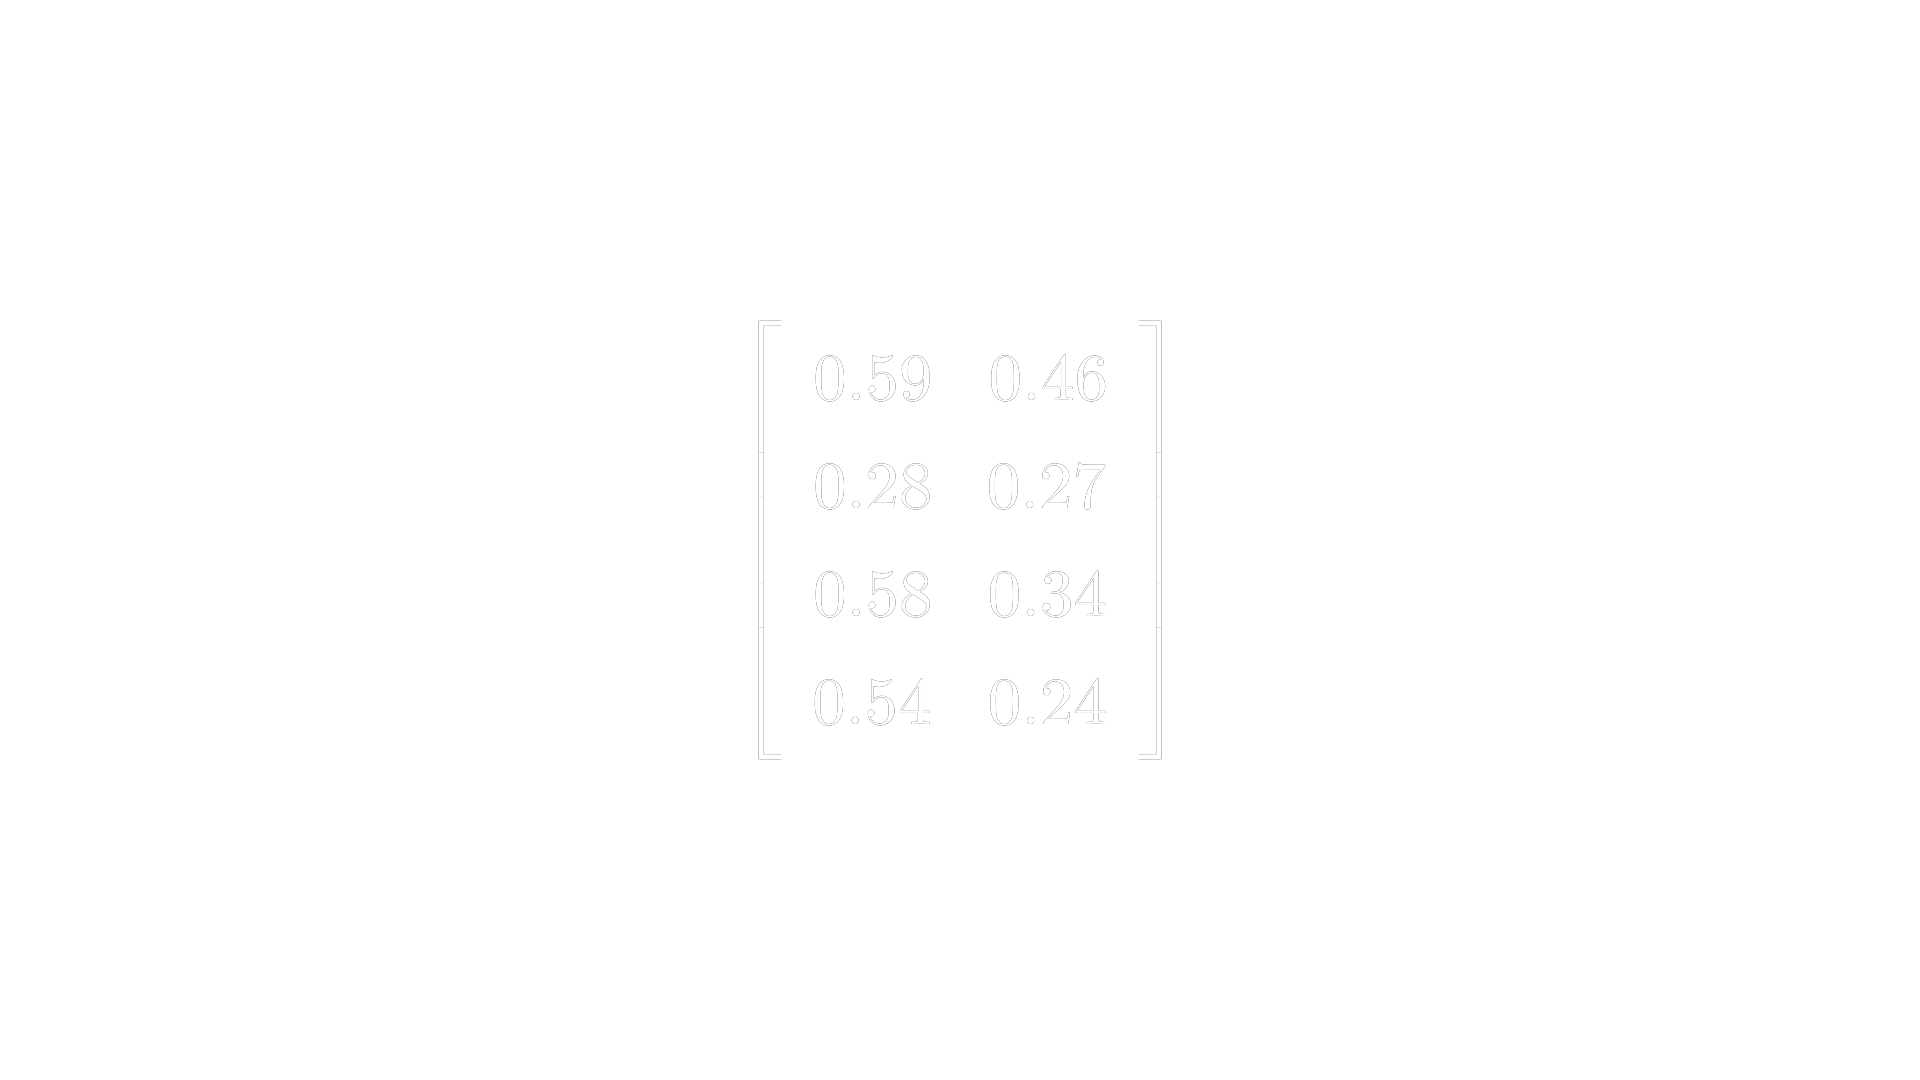

In [67]:
%%manim -qh --transparent -o xv.png InputWeight 

class InputWeight(Scene):
    def construct(self):
        W = Matrix(np.dot(x, v).round(2))
        self.add(W)


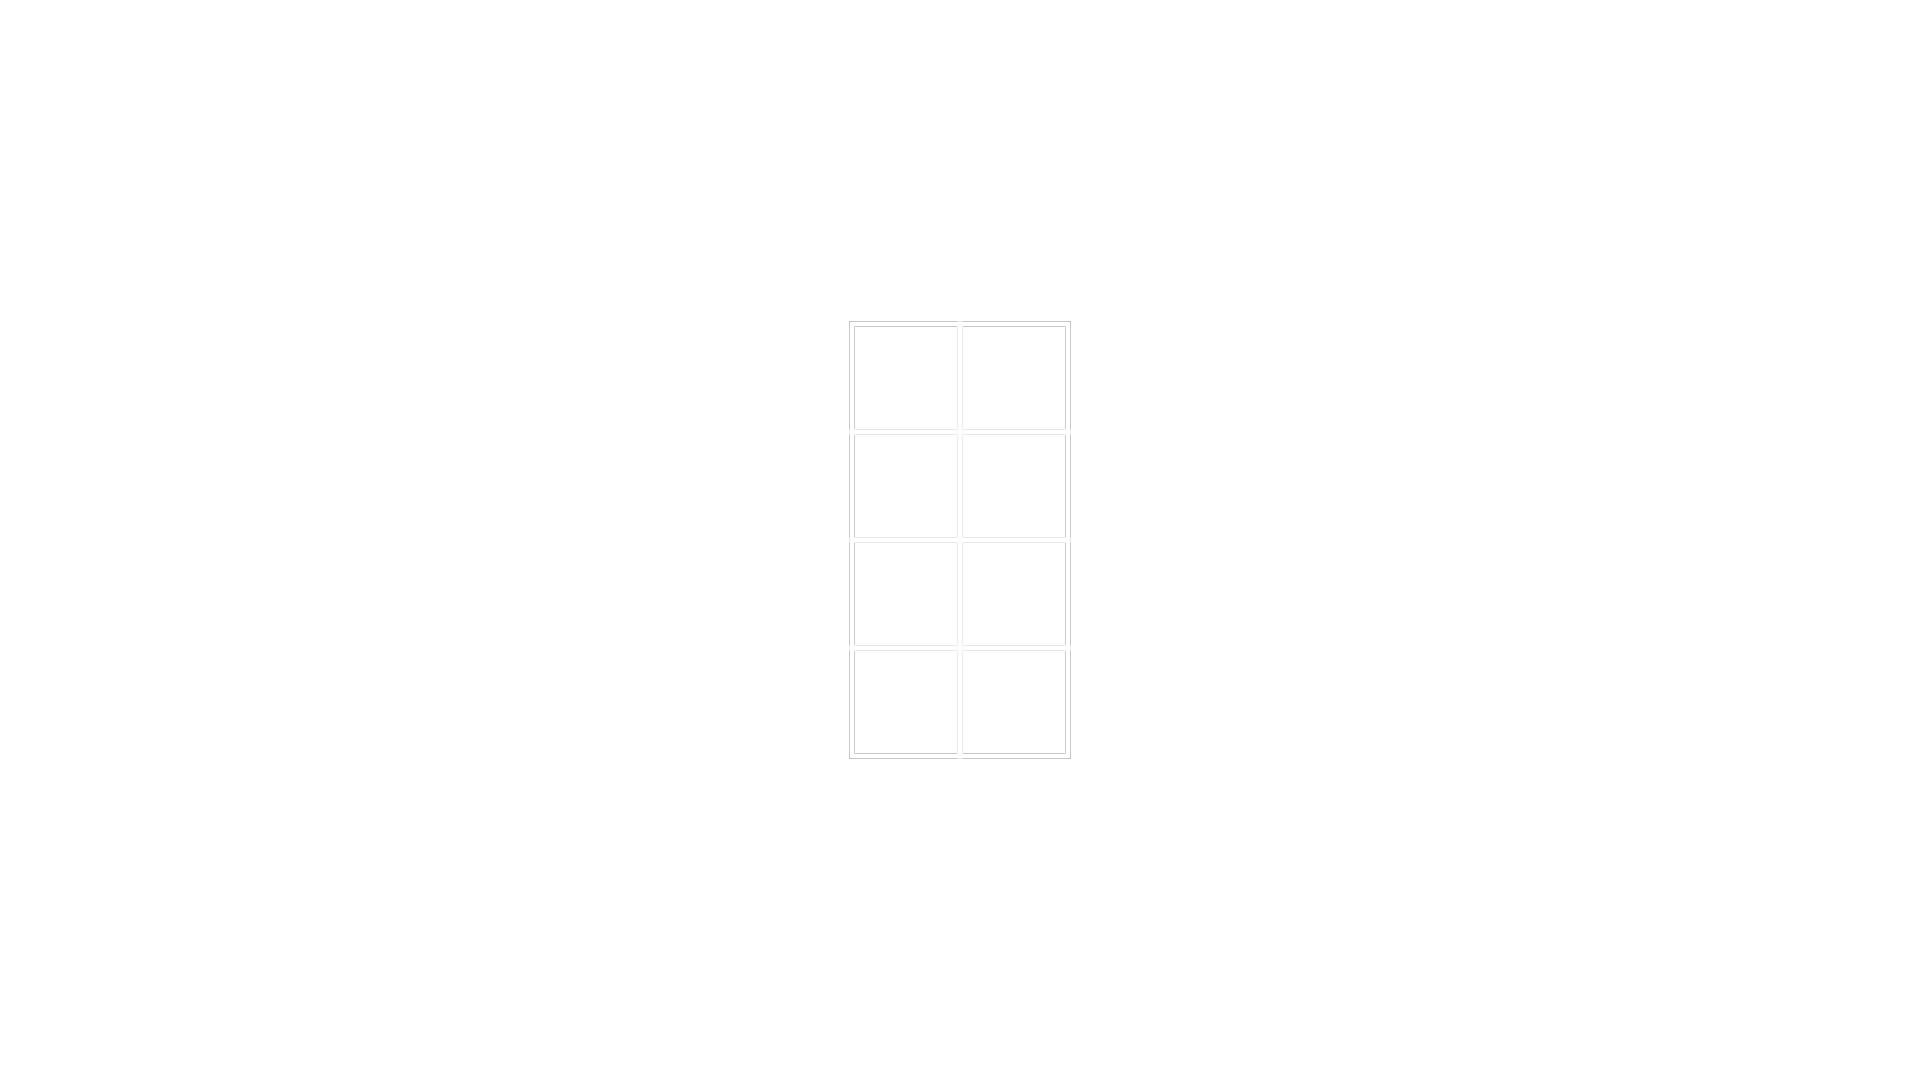

In [75]:
%%manim -qh --transparent -o 4x2.png EmptyMatrix

class EmptyMatrix(Scene):
    def construct(self, size=(4, 2)):
        squares = VGroup(*[Square(side_length=0.8) for _ in range(size[0] * size[1])])
        squares.arrange_in_grid(rows=size[0], cols=size[1], buff=0)
        self.add(squares)


In [63]:
%%manim -qh --disable_caching --transparent AttentionCalculation

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return (np.exp(x.T) / np.sum(np.exp(x.T), axis=0)).T

class AttentionCalculation(Scene):
    def construct(self):
        font_size = 30
        Qeq = Tex("Q =", color=WHITE, font_size = font_size)
        Keq = Tex("K =", color=WHITE, font_size = font_size)
        Veq = Tex("V =", color=WHITE, font_size = font_size)
        _q, _k, _v = Matrix(q, h_buff=1.5, bracket_h_buff=0.05), Matrix(k, h_buff=1.5, bracket_h_buff=0.05), Matrix(v, h_buff=1.5, bracket_h_buff=0.05)
        Qeq.scale(1.0).to_edge(UP + LEFT).shift(DOWN*0.8)
        Keq.scale(1.0).to_edge(LEFT)
        Veq.scale(1.0).to_edge(DOWN + LEFT).shift(UP*0.8)
        _q.scale(0.4).next_to(Qeq, RIGHT)
        _k.scale(0.4).next_to(Keq, RIGHT)
        _v.scale(0.4).next_to(Veq, RIGHT)
        self.play(Write(Qeq), Write(Keq), Write(Veq), Write(_q), Write(_k), Write(_v))
        self.play(_q.animate.move_to(_k).shift(RIGHT*3))
        _k_calc = Matrix(k.T, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).move_to(_q).shift(RIGHT*2)        
        self.play(Transform(_k, _k_calc))
        self.play(FadeOut(Qeq), FadeOut(Keq))
        
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
#         shape_A = Tex(f"{A.shape[0]} x {A.shape[1]}", color=WHITE, font_size = 20)
#         shape_B = Tex(f"{B.shape[0]} x {B.shape[1]}", color=WHITE, font_size = 20)
#         shape_C = Tex(f"{C.shape[0]} x {C.shape[1]}", color=WHITE, font_size = 20)
        
        Equals.next_to(_k_calc, RIGHT)
        self.play(Equals.animate)
        qk = q @ k.T
        _qk = Matrix(qk.round(2), h_buff=1.5, bracket_h_buff=0.05)
        _qk.scale(0.4).next_to(Equals)
        
        qk_elements = VGroup(*_qk)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in qk_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        qk_elements = VGroup(*qk_elements[0])  # Create array for matrix itself
    
        for i, row in enumerate(_q.get_rows()):
            for j, column in enumerate(_k_calc.get_columns()):
                row.set_color(RED)
                column.set_color(RED)
                Wait(0.5)
                _r = row.copy()
                _c = column.copy()
                res = qk_elements.copy()[i*k.T.shape[1] + j]
                logging.info(f"res at {i} & {j} ", res)
                g = VGroup(_r, _c)
                self.play(Transform(g, res), runtime=0.3)
                row.set_color(WHITE)
                column.set_color(WHITE)
        
        self.remove(_k_calc, _q, Equals, _k)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_qk.animate)        
        self.wait(1)
        self.play(_qk.animate.shift(LEFT*4))
        softmax_start = Tex("softmax(", color=WHITE, font_size = font_size)
        softmax_end = Tex(")", color=WHITE, font_size = font_size)
        self.play(Write(softmax_start.next_to(_qk, LEFT*0.8)), Write(softmax_end.next_to(_qk, RIGHT*0.8)))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(softmax_end, RIGHT)))
        
        sm_qk = softmax(qk).round(2)
        _sm_qk = Matrix(sm_qk, h_buff=1.5, bracket_h_buff=0.05)
        self.play(Write(_sm_qk.scale(0.4).next_to(Equals, RIGHT)))
        
        self.remove(Equals, softmax_start, softmax_end, _qk)
        self.play(_sm_qk.animate.shift(LEFT*4))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        self.add(Dot.next_to(_sm_qk, RIGHT))
        self.play(_v.animate.next_to(Dot, RIGHT))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(_v, RIGHT)), FadeOut(Veq))
        
        attn = sm_qk @ v
        attn = attn.round(2)
        _attn = Matrix(attn, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        
        attn_elements = VGroup(*_attn)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in attn_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        attn_elements = VGroup(*attn_elements[0])  # Create array for matrix itself
        
        for i, row in enumerate(_sm_qk.get_rows()):
            last_re = None
            plus = None
            row_collection_output = []
            for j, (row_element, column) in enumerate(zip(list(row), _v.get_rows())):
                row_element.set_color(RED)
                column.set_color(RED)
                _re = row_element.copy()
                _c = column.copy()
                res = attn_elements.copy()[i*v.shape[1]:i*v.shape[1] + v.shape[1]]
                logging.info(f"res at {i} & {j} ", res)
                
                if last_re is None:
                    self.play(_re.animate.shift(UP*(2+(i*0.32))).set_color(WHITE))
                else:
                    self.play(_re.animate.next_to(last_re, DOWN).set_color(WHITE))
                    plus = Tex("+", color=WHITE, font_size = font_size-10).next_to(_re, LEFT*0.4)
                open_para = Tex("(", color=WHITE, font_size = font_size).next_to(_re, RIGHT*0.3)
                close_para = Tex(")", color=WHITE, font_size = font_size)
                if plus:
                    self.play(plus.animate)
                self.play(open_para.animate, _c.animate.next_to(_re, RIGHT).set_color(WHITE))
                self.play(close_para.next_to(_c, RIGHT*0.3).animate, runtime=0.01)
                last_re = _re.copy()
#                 g = VGroup(_re, _c)
#                 self.play(Transform(g, res), runtime=0.3)
                row_element.set_color(WHITE)
                column.set_color(WHITE)
                if plus:
                    row_collection_output.append(plus)
                row_collection_output.append(_re)
                row_collection_output.append(_c)
                row_collection_output.append(open_para)
                row_collection_output.append(close_para)
                if (len(row_collection_output)+1) // 5 == attn.shape[0]:
                    line = Line(LEFT, RIGHT, stroke_width=0.5).next_to(_c, DOWN*0.5).shift(LEFT*0.15)
                    _res = res.copy().next_to(_c, DOWN)
                    self.play(line.animate)
                    self.play(_res.animate)
                    row_collection_output.append(line)
                    row_collection_output.append(_res)
                    g = VGroup(*row_collection_output)
                    self.play(Transform(g, res))
        self.remove(_sm_qk, _v, Equals, Dot)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_attn.animate.shift(LEFT))
        attn_text = Tex("Attention =", color=WHITE, font_size = font_size).next_to(_attn, LEFT)
        self.add(attn_text)
        
        self.wait(2)
        
        W_out = MathTex("W^{out} =", color=WHITE, font_size = font_size)
        W_out.scale(1.0).to_edge(LEFT)
        _w_out = Matrix(w_out, h_buff=1.5, bracket_h_buff=0.05)
        _w_out.scale(0.4).next_to(W_out, RIGHT)
        self.play(Write(W_out), Write(_w_out))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
        self.wait(2)
        self.remove(attn_text)
        self.play(_attn.animate.shift(LEFT*3))
        self.add(Dot.next_to(_attn, RIGHT))
        self.play(_w_out.animate.next_to(Dot, RIGHT))
        self.play(FadeOut(W_out))
        self.add(Equals.next_to(_w_out, RIGHT))
        
        out = attn @ w_out
        out = out.round(2)
        _out = Matrix(out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_out))
        self.wait(2)
        
        self.remove(Equals, Dot, _w_out, W_out, _attn)
        self.play(_out.animate.shift(LEFT*3))
        self.wait(2)
        
        xeq = Tex("x =", color=WHITE, font_size = font_size)
        xeq.scale(1.0).to_edge(LEFT)
        _x = Matrix(x, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(xeq, RIGHT)
        self.play(Write(xeq), Write(_x))
        Plus = Tex("+", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.add(Plus.next_to(_out, LEFT))
        self.play(_x.animate.next_to(Plus, LEFT))
        self.play(FadeOut(xeq))
        self.add(Equals.next_to(_out, RIGHT))
        
        full_out = x + out
        full_out = full_out.round(2)
        _full_out = Matrix(full_out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_full_out))
        self.wait(2)
        self.remove(Equals, Plus, _x, _out)
        self.play(_full_out.animate.shift(LEFT*2))
        output = Tex("output =", color=WHITE, font_size = font_size).next_to(_full_out, LEFT)
        self.add(output)
        
        
        self.wait()
        

In [7]:
%%manim -qh --transparent CoordinateSystem

class CoordinateSystem(Scene):
    def construct(self):
#         ax = Axes().add_coordinates()
        ax = Axes(x_range=[0,1,0.1], y_range=[0,1,0.1], x_length=6, y_length=6)
        plane = NumberPlane(         
                background_line_style={
                "stroke_color": GREY,
            })
        self.add(plane)
        for _v in q:
            _v = _v / np.linalg.norm(_v)
            _v = Vector(_v, stroke_width=2, tip_length=0.15).set_color(TEAL_C)
            self.play(Write(_v))
            
        for _v in k:
            _v = _v / np.linalg.norm(_v)
            _v = Vector(_v, stroke_width=2, tip_length=0.15).set_color(PURPLE_C)
            self.play(Write(_v))
            

In [3]:
%%manim -qh --disable_caching --transparent CAIntro

class CAIntro(Scene):
    def construct(self, size=2, font_size=30):
        img_rgb = ImageMobject("./images/mountain.png").scale(0.8)
        
        self.add(img_rgb)
        squares = VGroup(*[Square(side_length=1.5) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        self.play(Write(squares))
        
        self.wait(2)
        
        gridded_img_rgb = Group(img_rgb, squares)
        self.play(gridded_img_rgb.animate.shift(LEFT, UP*2).scale(0.6))
        
        arrow = Arrow(start=LEFT, end=RIGHT*0.5).next_to(gridded_img_rgb, RIGHT*1.5)
        self.play(Write(arrow))
        Q = Tex("Q", color=WHITE, font_size = font_size).next_to(arrow, RIGHT)
        self.play(Write(Q))
        
        cond_info = Tex(r"Conditional\\Information ", color=WHITE, font_size = font_size)
        cond_info.next_to(gridded_img_rgb, DOWN*8)
        self.play(Write(cond_info))
        
        _arrow2 = Arrow(start=LEFT, end=RIGHT*0.5).next_to(cond_info, RIGHT*1.5 + UP)
        _arrow3 = Arrow(start=LEFT, end=RIGHT*0.5).next_to(cond_info, RIGHT*1.5 + DOWN)
        self.play(Write(_arrow2), Write(_arrow3))
        K = Tex("K", color=WHITE, font_size = font_size).next_to(_arrow2, RIGHT)
        V = Tex("V", color=WHITE, font_size = font_size).next_to(_arrow3, RIGHT)
        self.play(Write(K), Write(V))
        
        self.wait(2)
        
        text_info = Tex(r"Text\\Condition", color=WHITE, font_size = font_size)
        text_info.move_to(cond_info)
        self.play(Transform(cond_info, text_info))
        
        self.wait(2)
        first_scene_all_objects = Group(*self.mobjects)
        self.play(FadeOut(first_scene_all_objects))
        
        
        
        
        r = Rectangle(width=3.0, height=1.5)
        transformer = Tex("Transformer", color=WHITE, font_size = 30)
        transformer.move_to(r)
        self.play(Write(r), Write(transformer))
        
        self.wait(2)
        
        encoder = Tex("Encoder", color=WHITE, font_size = 28)
        self.play(transformer.animate.shift(UP*0.3))
        encoder.move_to(transformer).shift(DOWN*0.5)
        self.play(Write(encoder))
        
        self.wait(0.5)
        
        transformer_encoder = VGroup(r, transformer, encoder)
        self.play(transformer_encoder.animate.scale(0.8).shift(RIGHT*3))
        
        self.wait(0.5)
        
        caption = Tex("caption", color=WHITE, font_size = 24)
        caption.to_edge(LEFT)
        self.play(Write(caption))
        
        arrow1 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow1.next_to(caption, RIGHT)
        self.play(FadeIn(arrow1))
        
        r2 = Rectangle(width=2.0, height=1.0)
        _tokenizer = Tex("Tokenizer", color=WHITE, font_size = 24)
        _tokenizer.move_to(r2)
        tokenizer = VGroup(r2, _tokenizer)
        tokenizer.next_to(arrow1)
        self.play(FadeIn(tokenizer))
        
        arrow2 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow2.next_to(tokenizer, RIGHT)
        self.play(FadeIn(arrow2))
        
        r3 = Rectangle(width=2.0, height=1.0)
        _embedding = Tex("Embedding", color=WHITE, font_size = 24)
        _embedding.move_to(r3)
        embedding = VGroup(r3, _embedding)
        embedding.next_to(arrow2)
        self.play(FadeIn(embedding))
        
        arrow3 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow3.next_to(embedding, RIGHT)
        self.play(FadeIn(arrow3))
        
        arrow4 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow4.next_to(transformer_encoder, RIGHT)
        self.play(FadeIn(arrow4))
        
        encoded_caption = Tex(r"Encoded\\Caption", color=WHITE, font_size = 24)
        encoded_caption.next_to(arrow4)
        self.play(Write(encoded_caption))
        
        all_objects = Group(*self.mobjects)
        self.play(all_objects.animate.shift(LEFT*6).scale(1.2))
        
        arrow5 = Arrow(UP, DOWN*0.2, stroke_width=2, tip_length=0.15)
        arrow5.next_to(encoded_caption, DOWN*0.6)
        self.play(FadeIn(arrow5))
        shape = Tex("shape = [1, 10, 512]", color=WHITE, font_size = 24)
        shape.next_to(arrow5, DOWN*0.6).shift(RIGHT)
        self.play(FadeIn(shape))
        
        self.wait(2.0)
        
        self.remove(arrow5, shape)
        self.play(all_objects.animate.shift(RIGHT*8))
        self.wait(2.0)
        
        real_caption = Tex(r"I love\\mountains", color=WHITE, font_size = 24)
        real_caption.move_to(caption)
        self.play(Transform(caption, real_caption))
        all_objects.remove(encoded_caption)
        self.play(FadeOut(encoded_caption))
        self.play(FadeOut(arrow4))
        
        ec = c
        _ec = Matrix(ec)
        
        self.play(all_objects.animate.shift(LEFT*8))
        _ec.scale(0.4).next_to(arrow4)
        shape_ec = Tex(f"{ec.shape[0]} x {ec.shape[1]}", color=WHITE, font_size = 24)
        shape_ec.next_to(_ec, DOWN)
        self.play(FadeIn(_ec), FadeIn(shape_ec))
        
        self.wait(2)
        
        second_scene_all_objects = Group(*self.mobjects)
        second_scene_all_objects.remove(_ec)
        self.play(FadeOut(second_scene_all_objects), _ec.animate.to_edge(UP + RIGHT))
        self.play(FadeIn(first_scene_all_objects))
        self.play(first_scene_all_objects.animate.to_corner(LEFT))
        
        self.play(_arrow2.animate.shift(UP*0.5), _arrow3.animate.shift(DOWN*0.5), K.animate.shift(UP*0.5), V.animate.shift(DOWN*0.5))
        
        Equals1 = Tex("=", color=WHITE, font_size = 24).next_to(Q, RIGHT)
        Equals2 = Tex("=", color=WHITE, font_size = 24).next_to(K, RIGHT)
        Equals3 = Tex("=", color=WHITE, font_size = 24).next_to(V, RIGHT)
        self.play(FadeIn(Equals1), FadeIn(Equals2), FadeIn(Equals3))
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{scalerel}")
        _xwq = MathTex("x \cdot W_{\scaleto{CA}{3pt}}^{Q}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals1, RIGHT)
        _cwksa = MathTex("c \cdot W_{\scaleto{CA}{3pt}}^{K}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals2, RIGHT)
        _cwvsa = MathTex("c \cdot W_{\scaleto{CA}{3pt}}^{V}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals3, RIGHT)
        self.play(FadeIn(_xwq), FadeIn(_cwksa), FadeIn(_cwvsa))
        
        _x = Matrix(x).scale(0.3).next_to(_xwq)
        _ec_2 = _ec.copy()
        self.play(_ec.animate.scale(0.8).next_to(_cwksa), _ec_2.animate.scale(0.8).next_to(_cwvsa), Write(_x))
        
        Dot1 = Tex(".", color=WHITE, font_size = 24).next_to(_x, RIGHT)
        Dot2 = Tex(".", color=WHITE, font_size = 24).next_to(_ec, RIGHT)
        Dot3 = Tex(".", color=WHITE, font_size = 24).next_to(_ec_2, RIGHT)
        self.add(Dot1, Dot2, Dot3)
        
        
        _wq = Matrix(wq).scale(0.3).next_to(Dot1)
        _wksa = Matrix(wksa).scale(0.3).next_to(Dot2, RIGHT)
        _wvsa = Matrix(wvsa).scale(0.3).next_to(Dot3, RIGHT)
        
        self.play(Write(_wksa), Write(_wvsa), Write(_wq))
        
        Equals4 = Tex("=", color=WHITE, font_size = 24).next_to(_wq, RIGHT)
        Equals5 = Tex("=", color=WHITE, font_size = 24).next_to(_wksa, RIGHT)
        Equals6 = Tex("=", color=WHITE, font_size = 24).next_to(_wvsa, RIGHT)
        self.play(FadeIn(Equals4), FadeIn(Equals5), FadeIn(Equals6))
        _q = Matrix(q).scale(0.3).next_to(Equals4, RIGHT)
        _ksa = Matrix(ksa.round(2)).scale(0.3).next_to(Equals5, RIGHT)
        _vsa = Matrix(vsa.round(2)).scale(0.3).next_to(Equals6, RIGHT)
        self.play(Write(_q), Write(_ksa), Write(_vsa))
        
        
        
        

In [4]:
%%manim -qh --disable_caching --transparent AttentionCalculationCA

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return (np.exp(x.T) / np.sum(np.exp(x.T), axis=0)).T

class AttentionCalculationCA(Scene):
    def construct(self):
        font_size = 30
        Qeq = Tex("Q =", color=WHITE, font_size = font_size)
        Keq = Tex("K =", color=WHITE, font_size = font_size)
        Veq = Tex("V =", color=WHITE, font_size = font_size)
        _q, _k, _v = Matrix(q, h_buff=1.5, bracket_h_buff=0.05), Matrix(ksa.round(2), h_buff=1.5, bracket_h_buff=0.05), Matrix(vsa.round(2), h_buff=1.5, bracket_h_buff=0.05)
        Qeq.scale(1.0).to_edge(UP + LEFT).shift(DOWN*0.8)
        Keq.scale(1.0).to_edge(LEFT)
        Veq.scale(1.0).to_edge(DOWN + LEFT).shift(UP*0.8)
        _q.scale(0.4).next_to(Qeq, RIGHT)
        _k.scale(0.4).next_to(Keq, RIGHT)
        _v.scale(0.4).next_to(Veq, RIGHT)
        self.play(Write(Qeq), Write(Keq), Write(Veq), Write(_q), Write(_k), Write(_v))
        self.play(_q.animate.move_to(_k).shift(RIGHT*3))
        _k_calc = Matrix(ksa.round(2).T, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).move_to(_q).shift(RIGHT*2)        
        self.play(Transform(_k, _k_calc))
        self.play(FadeOut(Qeq), FadeOut(Keq))
        
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
#         shape_A = Tex(f"{A.shape[0]} x {A.shape[1]}", color=WHITE, font_size = 20)
#         shape_B = Tex(f"{B.shape[0]} x {B.shape[1]}", color=WHITE, font_size = 20)
#         shape_C = Tex(f"{C.shape[0]} x {C.shape[1]}", color=WHITE, font_size = 20)
        
        Equals.next_to(_k_calc, RIGHT)
        self.play(Equals.animate)
        qk = q @ ksa.round(2).T
        _qk = Matrix(qk.round(2), h_buff=1.5, bracket_h_buff=0.05)
        _qk.scale(0.4).next_to(Equals)
        
        qk_elements = VGroup(*_qk)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in qk_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        qk_elements = VGroup(*qk_elements[0])  # Create array for matrix itself
    
        for i, row in enumerate(_q.get_rows()):
            for j, column in enumerate(_k_calc.get_columns()):
                row.set_color(RED)
                column.set_color(RED)
                Wait(0.5)
                _r = row.copy()
                _c = column.copy()
                res = qk_elements.copy()[i*ksa.round(2).T.shape[1] + j]
                logging.info(f"res at {i} & {j} ", res)
                g = VGroup(_r, _c)
                self.play(Transform(g, res), runtime=0.3)
                row.set_color(WHITE)
                column.set_color(WHITE)
        
        self.remove(_k_calc, _q, Equals, _k)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_qk.animate)        
        self.wait(1)
        self.play(_qk.animate.shift(LEFT*4))
        softmax_start = Tex("softmax(", color=WHITE, font_size = font_size)
        softmax_end = Tex(")", color=WHITE, font_size = font_size)
        self.play(Write(softmax_start.next_to(_qk, LEFT*0.8)), Write(softmax_end.next_to(_qk, RIGHT*0.8)))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(softmax_end, RIGHT)))
        
        sm_qk = softmax(qk).round(2)
        _sm_qk = Matrix(sm_qk, h_buff=1.5, bracket_h_buff=0.05)
        self.play(Write(_sm_qk.scale(0.4).next_to(Equals, RIGHT)))
        
        self.remove(Equals, softmax_start, softmax_end, _qk)
        self.play(_sm_qk.animate.shift(LEFT*4))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        self.add(Dot.next_to(_sm_qk, RIGHT))
        self.play(_v.animate.next_to(Dot, RIGHT))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(_v, RIGHT)), FadeOut(Veq))
        
        attn = sm_qk @ vsa.round(2)
        attn = attn.round(2)
        _attn = Matrix(attn, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        
        attn_elements = VGroup(*_attn)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in attn_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        attn_elements = VGroup(*attn_elements[0])  # Create array for matrix itself
        for i, row in enumerate(_sm_qk.get_rows()):
            last_re = None
            plus = None
            row_collection_output = []
            for j, (row_element, column) in enumerate(zip(list(row), _v.get_rows())):
                row_element.set_color(RED)
                column.set_color(RED)
                _re = row_element.copy()
                _c = column.copy()
                res = attn_elements.copy()[i*vsa.round(2).shape[1]:i*vsa.round(2).shape[1] + vsa.round(2).shape[1]]
                logging.info(f"res at {i} & {j} ", res)
                
                if last_re is None:
                    self.play(_re.animate.shift(UP*(2+(i*0.32))).set_color(WHITE))
                else:
                    self.play(_re.animate.next_to(last_re, DOWN).set_color(WHITE))
                    plus = Tex("+", color=WHITE, font_size = font_size-10).next_to(_re, LEFT*0.4)
                open_para = Tex("(", color=WHITE, font_size = font_size).next_to(_re, RIGHT*0.3)
                close_para = Tex(")", color=WHITE, font_size = font_size)
                if plus:
                    self.play(plus.animate)
                self.play(open_para.animate, _c.animate.next_to(_re, RIGHT).set_color(WHITE))
                self.play(close_para.next_to(_c, RIGHT*0.3).animate, runtime=0.01)
                last_re = _re.copy()
#                 g = VGroup(_re, _c)
#                 self.play(Transform(g, res), runtime=0.3)
                row_element.set_color(WHITE)
                column.set_color(WHITE)
                if plus:
                    row_collection_output.append(plus)
                row_collection_output.append(_re)
                row_collection_output.append(_c)
                row_collection_output.append(open_para)
                row_collection_output.append(close_para)
                if (len(row_collection_output)+1) // 5 == 3:
                    line = Line(LEFT, RIGHT, stroke_width=0.5).next_to(_c, DOWN*0.5).shift(LEFT*0.15)
                    _res = res.copy().next_to(_c, DOWN)
                    self.play(line.animate)
                    self.play(_res.animate)
                    row_collection_output.append(line)
                    row_collection_output.append(_res)
                    g = VGroup(*row_collection_output)
                    self.play(Transform(g, res))
        self.remove(_sm_qk, _v, Equals, Dot)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_attn.animate.shift(LEFT))
        attn_text = Tex("Attention =", color=WHITE, font_size = font_size).next_to(_attn, LEFT)
        self.add(attn_text)
        
        self.wait(2)
        
        W_out = MathTex("W^{out} =", color=WHITE, font_size = font_size)
        W_out.scale(1.0).to_edge(LEFT)
        _w_out = Matrix(w_out, h_buff=1.5, bracket_h_buff=0.05)
        _w_out.scale(0.4).next_to(W_out, RIGHT)
        self.play(Write(W_out), Write(_w_out))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
        self.wait(2)
        self.remove(attn_text)
        self.play(_attn.animate.shift(LEFT*3))
        self.add(Dot.next_to(_attn, RIGHT))
        self.play(_w_out.animate.next_to(Dot, RIGHT))
        self.play(FadeOut(W_out))
        self.add(Equals.next_to(_w_out, RIGHT))
        
        out = attn @ w_out
        out = out.round(2)
        _out = Matrix(out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_out))
        self.wait(2)
        
        self.remove(Equals, Dot, _w_out, W_out, _attn)
        self.play(_out.animate.shift(LEFT*3))
        self.wait(2)
        
        xeq = Tex("x =", color=WHITE, font_size = font_size)
        xeq.scale(1.0).to_edge(LEFT)
        _x = Matrix(x, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(xeq, RIGHT)
        self.play(Write(xeq), Write(_x))
        Plus = Tex("+", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.add(Plus.next_to(_out, LEFT))
        self.play(_x.animate.next_to(Plus, LEFT))
        self.play(FadeOut(xeq))
        self.add(Equals.next_to(_out, RIGHT))
        
        full_out = x + out
        full_out = full_out.round(2)
        _full_out = Matrix(full_out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_full_out))
        self.wait(2)
        self.remove(Equals, Plus, _x, _out)
        self.play(_full_out.animate.shift(LEFT*2))
        output = Tex("output =", color=WHITE, font_size = font_size).next_to(_full_out, LEFT)
        self.add(output)
        
        
        self.wait()
        

In [19]:
%%manim -qh --disable_caching --transparent AttentionCalculationCAFull

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return (np.exp(x.T) / np.sum(np.exp(x.T), axis=0)).T

class AttentionCalculationCAFull(Scene):
    def construct(self, size=2, font_size=30):
        img_rgb = ImageMobject("./images/mountain.png").scale(0.8)
        
        self.add(img_rgb)
        squares = VGroup(*[Square(side_length=1.5) for _ in range(size**2)])
        squares.arrange_in_grid(rows=size, cols=size, buff=0)
        self.play(Write(squares))
        
        self.wait(2)
        
        gridded_img_rgb = Group(img_rgb, squares)
        self.play(gridded_img_rgb.animate.shift(LEFT, UP*2).scale(0.6))
        
        arrow = Arrow(start=LEFT, end=RIGHT*0.5).next_to(gridded_img_rgb, RIGHT*1.5)
        self.play(Write(arrow))
        Q = Tex("Q", color=WHITE, font_size = font_size).next_to(arrow, RIGHT)
        self.play(Write(Q))
        
        cond_info = Tex(r"Conditional\\Information ", color=WHITE, font_size = font_size)
        cond_info.next_to(gridded_img_rgb, DOWN*8)
        self.play(Write(cond_info))
        
        _arrow2 = Arrow(start=LEFT, end=RIGHT*0.5).next_to(cond_info, RIGHT*1.5 + UP)
        _arrow3 = Arrow(start=LEFT, end=RIGHT*0.5).next_to(cond_info, RIGHT*1.5 + DOWN)
        self.play(Write(_arrow2), Write(_arrow3))
        K = Tex("K", color=WHITE, font_size = font_size).next_to(_arrow2, RIGHT)
        V = Tex("V", color=WHITE, font_size = font_size).next_to(_arrow3, RIGHT)
        self.play(Write(K), Write(V))
        
        self.wait(2)
        
        text_info = Tex(r"Text\\Condition", color=WHITE, font_size = font_size)
        text_info.move_to(cond_info)
        self.play(Transform(cond_info, text_info))
        
        self.wait(2)
        first_scene_all_objects = Group(*self.mobjects)
        self.play(FadeOut(first_scene_all_objects))
        
        
        
        
        r = Rectangle(width=3.0, height=1.5)
        transformer = Tex("Transformer", color=WHITE, font_size = 30)
        transformer.move_to(r)
        self.play(Write(r), Write(transformer))
        
        self.wait(2)
        
        encoder = Tex("Encoder", color=WHITE, font_size = 28)
        self.play(transformer.animate.shift(UP*0.3))
        encoder.move_to(transformer).shift(DOWN*0.5)
        self.play(Write(encoder))
        
        self.wait(0.5)
        
        transformer_encoder = VGroup(r, transformer, encoder)
        self.play(transformer_encoder.animate.scale(0.8).shift(RIGHT*3))
        
        self.wait(0.5)
        
        caption = Tex("caption", color=WHITE, font_size = 24)
        caption.to_edge(LEFT)
        self.play(Write(caption))
        
        arrow1 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow1.next_to(caption, RIGHT)
        self.play(FadeIn(arrow1))
        
        r2 = Rectangle(width=2.0, height=1.0)
        _tokenizer = Tex("Tokenizer", color=WHITE, font_size = 24)
        _tokenizer.move_to(r2)
        tokenizer = VGroup(r2, _tokenizer)
        tokenizer.next_to(arrow1)
        self.play(FadeIn(tokenizer))
        
        arrow2 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow2.next_to(tokenizer, RIGHT)
        self.play(FadeIn(arrow2))
        
        r3 = Rectangle(width=2.0, height=1.0)
        _embedding = Tex("Embedding", color=WHITE, font_size = 24)
        _embedding.move_to(r3)
        embedding = VGroup(r3, _embedding)
        embedding.next_to(arrow2)
        self.play(FadeIn(embedding))
        
        arrow3 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow3.next_to(embedding, RIGHT)
        self.play(FadeIn(arrow3))
        
        arrow4 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow4.next_to(transformer_encoder, RIGHT)
        self.play(FadeIn(arrow4))
        
        encoded_caption = Tex(r"Encoded\\Caption", color=WHITE, font_size = 24)
        encoded_caption.next_to(arrow4)
        self.play(Write(encoded_caption))
        
        all_objects = Group(*self.mobjects)
        self.play(all_objects.animate.shift(LEFT*6).scale(1.2))
        
        arrow5 = Arrow(UP, DOWN*0.2, stroke_width=2, tip_length=0.15)
        arrow5.next_to(encoded_caption, DOWN*0.6)
        self.play(FadeIn(arrow5))
        shape = Tex("shape = [1, 10, 512]", color=WHITE, font_size = 24)
        shape.next_to(arrow5, DOWN*0.6).shift(RIGHT)
        self.play(FadeIn(shape))
        
        self.wait(2.0)
        
        self.remove(arrow5, shape)
        self.play(all_objects.animate.shift(RIGHT*8))
        self.wait(2.0)
        
        real_caption = Tex(r"I love\\mountains", color=WHITE, font_size = 24)
        real_caption.move_to(caption)
        self.play(Transform(caption, real_caption))
        all_objects.remove(encoded_caption)
        self.play(FadeOut(encoded_caption))
        self.play(FadeOut(arrow4))
        
        ec = c
        _ec = Matrix(ec)
        
        self.play(all_objects.animate.shift(LEFT*8))
        _ec.scale(0.4).next_to(arrow4)
        shape_ec = Tex(f"{ec.shape[0]} x {ec.shape[1]}", color=WHITE, font_size = 24)
        shape_ec.next_to(_ec, DOWN)
        self.play(FadeIn(_ec), FadeIn(shape_ec))
        
        self.wait(2)
        
        second_scene_all_objects = Group(*self.mobjects)
        second_scene_all_objects.remove(_ec)
        self.play(FadeOut(second_scene_all_objects), _ec.animate.to_edge(UP + RIGHT))
        self.play(FadeIn(first_scene_all_objects))
        self.play(first_scene_all_objects.animate.to_corner(LEFT))
        
        self.play(_arrow2.animate.shift(UP*0.5), _arrow3.animate.shift(DOWN*0.5), K.animate.shift(UP*0.5), V.animate.shift(DOWN*0.5))
        
        Equals1 = Tex("=", color=WHITE, font_size = 24).next_to(Q, RIGHT)
        Equals2 = Tex("=", color=WHITE, font_size = 24).next_to(K, RIGHT)
        Equals3 = Tex("=", color=WHITE, font_size = 24).next_to(V, RIGHT)
        self.play(FadeIn(Equals1), FadeIn(Equals2), FadeIn(Equals3))
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{scalerel}")
        _xwq = MathTex("x \cdot W_{\scaleto{CA}{3pt}}^{Q}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals1, RIGHT)
        _cwksa = MathTex("c \cdot W_{\scaleto{CA}{3pt}}^{K}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals2, RIGHT)
        _cwvsa = MathTex("c \cdot W_{\scaleto{CA}{3pt}}^{V}  =", tex_template=myTemplate, color=WHITE, font_size = 24).next_to(Equals3, RIGHT)
        self.play(FadeIn(_xwq), FadeIn(_cwksa), FadeIn(_cwvsa))
        
        _x = Matrix(x).scale(0.3).next_to(_xwq)
        _ec_2 = _ec.copy()
        self.play(_ec.animate.scale(0.8).next_to(_cwksa), _ec_2.animate.scale(0.8).next_to(_cwvsa), Write(_x))
        
        Dot1 = Tex(".", color=WHITE, font_size = 24).next_to(_x, RIGHT)
        Dot2 = Tex(".", color=WHITE, font_size = 24).next_to(_ec, RIGHT)
        Dot3 = Tex(".", color=WHITE, font_size = 24).next_to(_ec_2, RIGHT)
        self.add(Dot1, Dot2, Dot3)
        
        
        _wq = Matrix(wq).scale(0.3).next_to(Dot1)
        _wksa = Matrix(wksa).scale(0.3).next_to(Dot2, RIGHT)
        _wvsa = Matrix(wvsa).scale(0.3).next_to(Dot3, RIGHT)
        
        self.play(Write(_wksa), Write(_wvsa), Write(_wq))
        
        Equals4 = Tex("=", color=WHITE, font_size = 24).next_to(_wq, RIGHT)
        Equals5 = Tex("=", color=WHITE, font_size = 24).next_to(_wksa, RIGHT)
        Equals6 = Tex("=", color=WHITE, font_size = 24).next_to(_wvsa, RIGHT)
        self.play(FadeIn(Equals4), FadeIn(Equals5), FadeIn(Equals6))
        _q = Matrix(q, h_buff=1.5, bracket_h_buff=0.05).scale(0.3).next_to(Equals4, RIGHT)
        _k = Matrix(ksa.round(2), h_buff=1.5, bracket_h_buff=0.05).scale(0.3).next_to(Equals5, RIGHT)
        _v = Matrix(vsa.round(2), h_buff=1.5, bracket_h_buff=0.05).scale(0.3).next_to(Equals6, RIGHT)
        self.play(Write(_q), Write(_k), Write(_v))
        
        self.wait(2)
        
        all_current_objects = Group(*self.mobjects)
        all_current_objects.remove(Q, K, V, Equals4, Equals5, Equals6, _q, _k, _v)
        self.play(FadeOut(all_current_objects))
        
        qc = Q.copy().to_edge(UP + LEFT).shift(DOWN*0.8)
        kc = K.copy().to_edge(LEFT)
        vc = V.copy().to_edge(DOWN + LEFT).shift(UP*0.8)
        
        self.play(
            Q.animate.scale(1.0).to_edge(UP + LEFT).shift(DOWN*0.8),
            K.animate.scale(1.0).to_edge(LEFT), 
            V.animate.scale(1.0).to_edge(DOWN + LEFT).shift(UP*0.8),
            Equals4.animate.next_to(qc),
            Equals5.animate.next_to(kc),
            Equals6.animate.next_to(vc),
            _q.animate.next_to(qc, RIGHT*3).scale(1.3),
            _k.animate.next_to(kc, RIGHT*3).scale(1.3),
            _v.animate.next_to(vc, RIGHT*3).scale(1.3),
        )
        
        self.wait(2)
        
        font_size = 30
#         Qeq = Tex("Q =", color=WHITE, font_size = font_size)
#         Keq = Tex("K =", color=WHITE, font_size = font_size)
#         Veq = Tex("V =", color=WHITE, font_size = font_size)
#         _q, _k, _v = Matrix(q, h_buff=1.5, bracket_h_buff=0.05), Matrix(ksa.round(2), h_buff=1.5, bracket_h_buff=0.05), Matrix(vsa.round(2), h_buff=1.5, bracket_h_buff=0.05)
#         Qeq.scale(1.0).to_edge(UP + LEFT).shift(DOWN*0.8)
#         Keq.scale(1.0).to_edge(LEFT)
#         Veq.scale(1.0).to_edge(DOWN + LEFT).shift(UP*0.8)
#         _q.scale(0.4).next_to(Q, RIGHT)
#         _k.scale(0.4).next_to(K, RIGHT)
#         _v.scale(0.4).next_to(V, RIGHT)
#         self.play(Write(Qeq), Write(Keq), Write(Veq), Write(_q), Write(_k), Write(_v))
#         self.play(Write(_q), Write(_k), Write(_v))
        self.play(_q.animate.move_to(_k).shift(RIGHT*3))
        _k_calc = Matrix(ksa.round(2).T, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).move_to(_q).shift(RIGHT*2)        
        self.play(Transform(_k, _k_calc))
        self.play(FadeOut(Q), FadeOut(K), FadeOut(Equals4), FadeOut(Equals5))
        
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
#         shape_A = Tex(f"{A.shape[0]} x {A.shape[1]}", color=WHITE, font_size = 20)
#         shape_B = Tex(f"{B.shape[0]} x {B.shape[1]}", color=WHITE, font_size = 20)
#         shape_C = Tex(f"{C.shape[0]} x {C.shape[1]}", color=WHITE, font_size = 20)
        
        Equals.next_to(_k_calc, RIGHT)
        self.play(Equals.animate)
        qk = q @ ksa.round(2).T
        _qk = Matrix(qk.round(2), h_buff=1.5, bracket_h_buff=0.05)
        _qk.scale(0.4).next_to(Equals)
        
        qk_elements = VGroup(*_qk)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in qk_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        qk_elements = VGroup(*qk_elements[0])  # Create array for matrix itself
    
        for i, row in enumerate(_q.get_rows()):
            for j, column in enumerate(_k_calc.get_columns()):
                row.set_color(RED)
                column.set_color(RED)
                Wait(0.5)
                _r = row.copy()
                _c = column.copy()
                res = qk_elements.copy()[i*ksa.round(2).T.shape[1] + j]
                logging.info(f"res at {i} & {j} ", res)
                g = VGroup(_r, _c)
                self.play(Transform(g, res), runtime=0.3)
                row.set_color(WHITE)
                column.set_color(WHITE)
        
        self.remove(_k_calc, _q, Equals, _k)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_qk.animate)        
        self.wait(1)
        self.play(_qk.animate.shift(LEFT*4))
        softmax_start = Tex("softmax(", color=WHITE, font_size = font_size)
        softmax_end = Tex(")", color=WHITE, font_size = font_size)
        self.play(Write(softmax_start.next_to(_qk, LEFT*0.8)), Write(softmax_end.next_to(_qk, RIGHT*0.8)))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(softmax_end, RIGHT)))
        
        sm_qk = softmax(qk).round(2)
        _sm_qk = Matrix(sm_qk, h_buff=1.5, bracket_h_buff=0.05)
        self.play(Write(_sm_qk.scale(0.4).next_to(Equals, RIGHT)))
        
        self.remove(Equals, softmax_start, softmax_end, _qk)
        self.play(_sm_qk.animate.shift(LEFT*4))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        self.add(Dot.next_to(_sm_qk, RIGHT))
        self.play(_v.animate.next_to(Dot, RIGHT))
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.play(Write(Equals.next_to(_v, RIGHT)), FadeOut(V), FadeOut(Equals6))
        
        attn = sm_qk @ vsa.round(2)
        attn = attn.round(2)
        _attn = Matrix(attn, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        
        attn_elements = VGroup(*_attn)
#         # C_elements, first element seems to be the matrix itself and second and third are opening and closing brackets.
        for i in attn_elements[1:]:  # Here we only print [ and ]
            self.play(Write(i), runtime=0.01)
        attn_elements = VGroup(*attn_elements[0])  # Create array for matrix itself
        for i, row in enumerate(_sm_qk.get_rows()):
            last_re = None
            plus = None
            row_collection_output = []
            for j, (row_element, column) in enumerate(zip(list(row), _v.get_rows())):
                row_element.set_color(RED)
                column.set_color(RED)
                _re = row_element.copy()
                _c = column.copy()
                res = attn_elements.copy()[i*vsa.round(2).shape[1]:i*vsa.round(2).shape[1] + vsa.round(2).shape[1]]
                logging.info(f"res at {i} & {j} ", res)
                
                if last_re is None:
                    self.play(_re.animate.shift(UP*(2+(i*0.32))).set_color(WHITE))
                else:
                    self.play(_re.animate.next_to(last_re, DOWN).set_color(WHITE))
                    plus = Tex("+", color=WHITE, font_size = font_size-10).next_to(_re, LEFT*0.4)
                open_para = Tex("(", color=WHITE, font_size = font_size).next_to(_re, RIGHT*0.3)
                close_para = Tex(")", color=WHITE, font_size = font_size)
                if plus:
                    self.play(plus.animate)
                self.play(open_para.animate, _c.animate.next_to(_re, RIGHT).set_color(WHITE))
                self.play(close_para.next_to(_c, RIGHT*0.3).animate, runtime=0.01)
                last_re = _re.copy()
#                 g = VGroup(_re, _c)
#                 self.play(Transform(g, res), runtime=0.3)
                row_element.set_color(WHITE)
                column.set_color(WHITE)
                if plus:
                    row_collection_output.append(plus)
                row_collection_output.append(_re)
                row_collection_output.append(_c)
                row_collection_output.append(open_para)
                row_collection_output.append(close_para)
                if (len(row_collection_output)+1) // 5 == 3:
                    line = Line(LEFT, RIGHT, stroke_width=0.5).next_to(_c, DOWN*0.5).shift(LEFT*0.15)
                    _res = res.copy().next_to(_c, DOWN)
                    self.play(line.animate)
                    self.play(_res.animate)
                    row_collection_output.append(line)
                    row_collection_output.append(_res)
                    g = VGroup(*row_collection_output)
                    self.play(Transform(g, res))
        self.remove(_sm_qk, _v, Equals, Dot)
        self.remove(*[o for o in self.mobjects if isinstance(o, VGroup)])
        self.play(_attn.animate.shift(LEFT))
        attn_text = Tex("Attention =", color=WHITE, font_size = font_size).next_to(_attn, LEFT)
        self.add(attn_text)
        
        self.wait(2)
        
        W_out = MathTex("W^{out} =", color=WHITE, font_size = font_size)
        W_out.scale(1.0).to_edge(LEFT)
        _w_out = Matrix(w_out, h_buff=1.5, bracket_h_buff=0.05)
        _w_out.scale(0.4).next_to(W_out, RIGHT)
        self.play(Write(W_out), Write(_w_out))
        Dot = Tex(".", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        
        self.wait(2)
        self.remove(attn_text)
        self.play(_attn.animate.shift(LEFT*2))
        self.add(Dot.next_to(_attn, RIGHT))
        self.play(_w_out.animate.next_to(Dot, RIGHT))
        self.play(FadeOut(W_out))
        self.add(Equals.next_to(_w_out, RIGHT))
        
        out = attn @ w_out
        out = out.round(2)
        _out = Matrix(out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_out))
        self.wait(2)
        
        self.remove(Equals, Dot, _w_out, W_out, _attn)
        self.play(_out.animate.shift(LEFT*2))
        self.wait(2)
        
        xeq = Tex("x =", color=WHITE, font_size = font_size)
        xeq.scale(1.0).to_edge(LEFT)
        _x = Matrix(x, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(xeq, RIGHT)
        self.play(Write(xeq), Write(_x))
        Plus = Tex("+", color=WHITE, font_size = font_size)
        Equals = Tex("=", color=WHITE, font_size = font_size)
        self.add(Plus.next_to(_out, LEFT))
        self.play(_x.animate.next_to(Plus, LEFT))
        self.play(FadeOut(xeq))
        self.add(Equals.next_to(_out, RIGHT))
        
        full_out = x + out
        full_out = full_out.round(2)
        _full_out = Matrix(full_out, h_buff=1.5, bracket_h_buff=0.05).scale(0.4).next_to(Equals, RIGHT)
        self.play(Write(_full_out))
        self.wait(2)
        self.remove(Equals, Plus, _x, _out)
        self.play(_full_out.animate.shift(LEFT*2))
        output = Tex("output =", color=WHITE, font_size = font_size).next_to(_full_out, LEFT)
        self.add(output)
        
        
        self.wait()
        

In [7]:
%%manim -qh TextRepr

class TextRepr(Scene):
    def construct(self):
        r = Rectangle(width=3.0, height=1.5)
        transformer = Tex("Transformer", color=WHITE, font_size = 30)
        transformer.move_to(r)
        self.play(Write(r), Write(transformer))
        
        self.wait(2)
        
        encoder = Tex("Encoder", color=WHITE, font_size = 28)
        self.play(transformer.animate.shift(UP*0.3))
        encoder.move_to(transformer).shift(DOWN*0.5)
        self.play(Write(encoder))
        
        self.wait(0.5)
        
        transformer_encoder = VGroup(r, transformer, encoder)
        self.play(transformer_encoder.animate.scale(0.8).shift(RIGHT*3))
        
        self.wait(0.5)
        
        caption = Tex("caption", color=WHITE, font_size = 24)
        caption.to_edge(LEFT)
        self.play(Write(caption))
        
        arrow1 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow1.next_to(caption, RIGHT)
        self.play(FadeIn(arrow1))
        
        r2 = Rectangle(width=2.0, height=1.0)
        _tokenizer = Tex("Tokenizer", color=WHITE, font_size = 24)
        _tokenizer.move_to(r2)
        tokenizer = VGroup(r2, _tokenizer)
        tokenizer.next_to(arrow1)
        self.play(FadeIn(tokenizer))
        
        arrow2 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow2.next_to(tokenizer, RIGHT)
        self.play(FadeIn(arrow2))
        
        r3 = Rectangle(width=2.0, height=1.0)
        _embedding = Tex("Embedding", color=WHITE, font_size = 24)
        _embedding.move_to(r3)
        embedding = VGroup(r3, _embedding)
        embedding.next_to(arrow2)
        self.play(FadeIn(embedding))
        
        arrow3 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow3.next_to(embedding, RIGHT)
        self.play(FadeIn(arrow3))
        
        arrow4 = Arrow(LEFT, RIGHT*0.2, stroke_width=2, tip_length=0.15)
        arrow4.next_to(transformer_encoder, RIGHT)
        self.play(FadeIn(arrow4))
        
        encoded_caption = Tex(r"Encoded\\Caption", color=WHITE, font_size = 24)
        encoded_caption.next_to(arrow4)
        self.play(Write(encoded_caption))
        
        all_objects = Group(*self.mobjects)
        self.play(all_objects.animate.shift(LEFT*6).scale(1.2))
        
        arrow5 = Arrow(UP, DOWN*0.2, stroke_width=2, tip_length=0.15)
        arrow5.next_to(encoded_caption, DOWN*0.6)
        self.play(FadeIn(arrow5))
        shape = Tex("shape = [1, 10, 512]", color=WHITE, font_size = 24)
        shape.next_to(arrow5, DOWN*0.6).shift(RIGHT)
        self.play(FadeIn(shape))
        
        self.wait(2.0)
        
        self.remove(arrow5, shape)
        self.play(all_objects.animate.shift(RIGHT*8))
        self.wait(2.0)
        
        real_caption = Tex(r"I love\\mountains", color=WHITE, font_size = 24)
        real_caption.move_to(caption)
        self.play(Transform(caption, real_caption))
        self.remove(encoded_caption)
        
        ec = np.random.rand(3, 6).round(2)
        _ec = Matrix(ec)
        
        self.play(all_objects.animate.shift(LEFT*8))
        _ec.scale(0.4).next_to(arrow4)
        shape_ec = Tex(f"{ec.shape[0]} x {ec.shape[1]}", color=WHITE, font_size = 24)
        shape_ec.next_to(_ec, DOWN)
        self.play(FadeIn(_ec), FadeIn(shape_ec))
        
        self.wait(2)
        
        


In [38]:
np.random.rand(3, 6)

array([[0.03438852, 0.9093204 , 0.25877998, 0.66252228, 0.31171108,
        0.52006802],
       [0.54671028, 0.18485446, 0.96958463, 0.77513282, 0.93949894,
        0.89482735],
       [0.59789998, 0.92187424, 0.0884925 , 0.19598286, 0.04522729,
        0.32533033]])

In [7]:
p = np.random.randn(4,4).round(2)
p = Matrix(p)
print(list(p.get_entries()))
print(list(p.get_rows()))

[MathTex('-0.12'), MathTex('-0.3'), MathTex('-1.48'), MathTex('-0.72'), MathTex('-0.46'), MathTex('1.06'), MathTex('0.34'), MathTex('-1.76'), MathTex('0.32'), MathTex('-0.39'), MathTex('-0.68'), MathTex('0.61'), MathTex('1.03'), MathTex('0.93'), MathTex('-0.84'), MathTex('-0.31')]
[VGroup(MathTex('-0.12'), MathTex('-0.3'), MathTex('-1.48'), MathTex('-0.72')), VGroup(MathTex('-0.46'), MathTex('1.06'), MathTex('0.34'), MathTex('-1.76')), VGroup(MathTex('0.32'), MathTex('-0.39'), MathTex('-0.68'), MathTex('0.61')), VGroup(MathTex('1.03'), MathTex('0.93'), MathTex('-0.84'), MathTex('-0.31'))]


In [138]:
bruh = q @ k.T
t = np.exp(bruh.T)/np.sum(np.exp(bruh.T), axis=0)
t.T

array([[0.26523016, 0.18957751, 0.30332292, 0.24186941],
       [0.25701886, 0.21382319, 0.28187098, 0.24728697],
       [0.26454658, 0.16587215, 0.3311652 , 0.23841607],
       [0.26649216, 0.1749928 , 0.31920861, 0.23930642]])

In [60]:
img_rgb = ImageMobject("./images/mountain.png").scale(0.8)

squares = VGroup(*[Square(side_length=1.5) for _ in range(2**2)])
squares.arrange_in_grid(rows=2, cols=2, buff=0)

gridded_img_rgb = Group(img_rgb, squares)

In [6]:
img_rgb = ImageMobject("./images/mountain.png").scale(0.8).to_corner(LEFT)

In [78]:
gridded_img_rgb.__dict__["submobjects"][0].__dict__["pixel_array"] = get_image_channel(img_rgb, channel=0, scale=sc)

(512, 512, 4)

In [76]:
gridded_img_rgb.__dict__["submobjects"][0].__dict__

{'fill_opacity': 1,
 'stroke_opacity': 1,
 'invert': False,
 'image_mode': 'RGBA',
 'pixel_array': array([[[111, 107, 139, 255],
         [109, 105, 143, 255],
         [109, 104, 142, 255],
         ...,
         [ 71,  88, 122, 255],
         [ 70,  89, 124, 255],
         [ 71,  86, 117, 255]],
 
        [[110, 106, 141, 255],
         [110, 106, 143, 255],
         [110, 106, 142, 255],
         ...,
         [ 72,  88, 122, 255],
         [ 69,  88, 123, 255],
         [ 70,  90, 123, 255]],
 
        [[111, 106, 140, 255],
         [111, 107, 141, 255],
         [110, 106, 142, 255],
         ...,
         [ 72,  88, 122, 255],
         [ 70,  89, 121, 255],
         [ 71,  88, 121, 255]],
 
        ...,
 
        [[ 39,  31,   2, 255],
         [ 52,  45,  12, 255],
         [ 49,  44,   2, 255],
         ...,
         [  8,  10,   2, 255],
         [ 14,  17,   3, 255],
         [ 14,  17,   1, 255]],
 
        [[ 37,  30,   0, 255],
         [ 48,  40,   4, 255],
         [ 56

In [71]:
gridded_img_rgb.__dict__

{'name': 'Group',
 'dim': 3,
 'target': None,
 'z_index': 0,
 'point_hash': None,
 'submobjects': [ImageMobject, VGroup(Square, Square, Square, Square)],
 'updaters': [],
 'updating_suspended': False,
 'color': <Color white>,
 'points': array([], shape=(0, 3), dtype=float64)}

In [64]:
gridded_img_rgb.__dir__()

['name',
 'dim',
 'target',
 'z_index',
 'point_hash',
 'submobjects',
 'updaters',
 'updating_suspended',
 'color',
 'points',
 '__module__',
 '__doc__',
 '__init__',
 'animation_overrides',
 '_original__init__',
 '__abstractmethods__',
 '_abc_impl',
 '__init_subclass__',
 'animation_override_for',
 '_add_intrinsic_animation_overrides',
 'add_animation_override',
 'set_default',
 'animate',
 '__deepcopy__',
 '__repr__',
 'reset_points',
 'init_colors',
 'generate_points',
 'add',
 'insert',
 '__add__',
 '__iadd__',
 'add_to_back',
 'remove',
 '__sub__',
 '__isub__',
 'set',
 '__getattr__',
 'width',
 'height',
 'depth',
 'get_array_attrs',
 'apply_over_attr_arrays',
 'get_image',
 'show',
 'save_image',
 'copy',
 'generate_target',
 'update',
 'get_time_based_updaters',
 'has_time_based_updater',
 'get_updaters',
 'get_family_updaters',
 'add_updater',
 'remove_updater',
 'clear_updaters',
 'match_updaters',
 'suspend_updating',
 'resume_updating',
 'apply_to_family',
 'shift',
 'scal